# Guide Project: Insights from StarWar survey

Scenario: While waiting for __Star Wars: The Force Awakens__ to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: __does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?__

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses for all, and now we will clean it to see what's the hidden insights of this survey: __Are the StarWar's fan feel that The Empire Strikes Back is the best of all series?__

To clearly, __the Episode: The Empire Strikes Back__ is created and introduced __from 1980's__, and while the team FiveThirtyEight created this survey (2015s'), there are total 4 episode is introduced after The Empire Strikes Back. Our task is _find the insight from this survey data to answer the question that team FiveThirtyEight interest_: we can accept it or reject it depend on the data's result we have. The conclusion at the end of this project will be the final answer for the team.

Because we will work with csv file, but sometime we don't know what's that's file encoding? So, we will make a function to check the file encoding before we load in DataFrame.

In [1]:
# pip install chardet

In [2]:
## Check the file encoding:

from chardet.universaldetector import UniversalDetector

def detect_encode(file_name):
    
    detector = UniversalDetector()
    for item in open(file_name, 'rb'):
        detector.feed(item)
        if detector.done: break
        detector.close()
        print(detector.result)

Now let's download the file into our local and check the encoding of this.

In [3]:
# # Download the file:

# import opendatasets as od
# page='https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv'
# od.download(page)

In [4]:
## Check the encoding:
detect_encode('StarWars.csv')

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


The encoding of file is in `Windows-1252`, so we will pass this encoding name into function call our DataFrame, and check file the final times to sure everything is OK.

In [5]:
## Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
## Load data in:
starwar = pd.read_csv('StarWars.csv', encoding='Windows-1252', delimiter=',')
starwar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

Let's see a few records to know the data more clearly:

In [7]:
# Setting for maximum columns = 60
pd.set_option('display.max_columns',60)

# Check the first 5 records:
starwar.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We can see the structre of this survey like this:
- On the top index column: 9 question in total, 5 field is personal information. In 9 question:
1. From the 3rd question: The attendance have more than 1 selection, co-responde with each filter menu of question
- Behind the index column is the menu filter with the suggest answer, the attendance fill with fixed answer like: YES, NO, some adjective...
- The answer of attendance is actually at the 2nd record => We're considering to modify the index column + 1st record, or somehow to make column more clean.

# Clean data

__1. Handle YES/NO columns__

We have two filed of YES/NO column:
- `Have you seen any of the 6 films in the Star Wars franchise?` (1st)
- `Do you consider yourself to be a fan of the Star Wars film franchise?` (2nd)

As each field can contains missing value (due to attendance reject to answer), we do the following:
1. Count the value of each filed: By the `df.info()` function we know the first filed is none of missing, but the 2nd has => we will count again to confirm
2. Convert YES/ NO to boolean: by `series.map()` function.

The process will be like the code block below.

In [8]:
# Count the unique value again:
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
starwar['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes         552
NaN         350
No          284
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Skip thorugh the Respond records, we will convert the other value now:

In [10]:
# Convert the value to boolean:
yes_no = {'Yes':True, 'No':False}

col = ['Have you seen any of the 6 films in the Star Wars franchise?',
      'Do you consider yourself to be a fan of the Star Wars film franchise?']

for item in col:
    starwar[item] = starwar[item].map(yes_no, na_action='ignore')

In [11]:
# Check the result:
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
NaN        1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [12]:
starwar['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      351
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

__2. Clean Check-box columns__

Everything seem OK, now let's take the next step with the next 6 question, we can see that:
- On the field `Which of the following Star Wars films have you seen? Please select all that apply.`, right below it is title film: `Star Wars: Episode I The Phantom Menace` with mean that the 1st question is about the attendance seen the Eposide 1 or not
- Next is the same, `Star Wars: Episode II Attack of the Clones`...
- Right behind these column is the answer with whether repeat the film title/ NaN (not seen answer).

With that said, we can do the following below:
1. Check the value contains in each field, modify the string if need
2. Convert the title film as TRUE, NaN as False
3. Rename column name: Exp: `Which of the following Star Wars films have you seen? Please select all that apply.` => `seen_1`

In [13]:
# Check the unique value on each field:
def check_value(df, start, end):
    col_check = df.columns[start:end]
    result = []
    for item in col_check:
        val = df[item].unique()
        result.append(val[0])
        if val[1] not in result:
            val[1] = np.nan
            result.append(val[1])
            continue
    return result


In [14]:
check_value(starwar,3, 9)

['Star Wars: Episode I  The Phantom Menace',
 nan,
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi']

In [15]:
# Convert the value to boolean:
convert_value = check_value(starwar,3,9)
mapper = {}
for name in convert_value:
    if len(str(name))==3:
        mapper[name] = False
        continue
    mapper[name] = True
        

In [16]:
def convert_value(df, start, end):
    cols = df.columns[start:end]
    for i in cols:
        df[i] = df[i].map(mapper)
    return df[i]

In [17]:
convert_value(starwar,3,9)

0        True
1        True
2       False
3       False
4        True
        ...  
1182     True
1183     True
1184    False
1185     True
1186     True
Name: Unnamed: 8, Length: 1187, dtype: bool

In [18]:
# Convert the name of column:
def convert_columns(df, start, end, str_, number):
    
    cols = df.columns[start:end]
    revert = []
    for i in range(1,number+1):
        revert.append('{}_{}'.format(str_,i))

    mapp = {}
    for old, new in zip(cols, revert):
        mapp[old] = new
    
    return df.rename(mapp, inplace=True, axis=1)
     

In [19]:
## Run the function
convert_columns(starwar, 3, 9, 'seen', 6)

In [20]:
## Check some records:
starwar.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


__3. Clean the ranking columns:__

Similary as the Check-box columns above, but now we don't need to cleaning as much as the Check-boxs field. Instead, we rename the column to be `ranking_n` and cast the value to be numeric type.

In [21]:
# Cast the value:
starwar[starwar.columns[9:15]] = starwar.loc[2:,starwar.columns[9:15]].astype('float')

In [22]:
# Check:
starwar[starwar.columns[9:15]].dtypes

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    float64
Unnamed: 10                                                                                                                                      float64
Unnamed: 11                                                                                                                                      float64
Unnamed: 12                                                                                                                                      float64
Unnamed: 13                                                                                                                                      float64
Unnamed: 14                                                                                                                                      float64
dtype: object

In [23]:
# Rename the columns:
# Convert the name of column:
convert_columns(starwar, 9, 15, 'ranking', 6)

In [24]:
## Check:
starwar.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


__4. Clean the favourable columns__

Like the structre of Check-boxs and Ranking field, the favourable field have these structre:
- On the top: From `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` to `Unnamed: 28` is the question, co-responed to:
1. `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` => `Han Solo`
2. `Unname: 16` => Luke Skywalker, and so on
- In the answer form, we can see: `Very favourably`,`Somewhat favorably`,`Unfamiliar`,`NA`

So, what we should do is:
- Change the column name first, to avoid loss actor name
- Check the unique value of these field, and
- Convert the adjective into 3 rank: A,B,C co-respone to 3 degree: `Very favourably`,`Somewhat favorably`,`Unfamiliar`, and of course, N/A is 'C'
- Keep the records of actor's name, because we will use these records to summarize data.

The convert process will be shown as code-block below.

In [25]:
# Get the columns name and the name of actor:
list_actor_name = starwar.iloc[0,15:29].values
actor_name = [] 
for ac_name in list_actor_name:
    names = (ac_name
                      .replace(' ','_')
                      .lower()
                      .strip())
    actor_name.append(names)

# modify the actor name:
old_name = starwar.columns[15:29]
mapp1 = {}
for od, nw in zip(old_name, actor_name):
    mapp1[od] = nw
starwar.rename(mapper=mapp1, inplace=True, axis=1)

# Check the result:
starwar.columns[15:29]

Index(['han_solo', 'luke_skywalker', 'princess_leia_organa',
       'anakin_skywalker', 'obi_wan_kenobi', 'emperor_palpatine',
       'darth_vader', 'lando_calrissian', 'boba_fett', 'c-3p0', 'r2_d2',
       'jar_jar_binks', 'padme_amidala', 'yoda'],
      dtype='object')

In [26]:
# Check the unique value in each field:
starwar['han_solo'].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Han Solo                                         1
Very unfavorably                                 1
Name: han_solo, dtype: int64

We will do a little change of our process:
- The evaluate rank is: `Very favorably`, `Somewhat favorably`, `Neither favorably nor unfavorably`,`Unfamiliar`,`Somewhat unfavorably`, `Very unfavorably` => We will change our standardized rank as: 
1. 1: `Very favorably`
2. 2: `Somewhat favorably`
3. 3: `Neither favorably nor unfavorably (neutral)`
4. 4: `Unfamiliar` or NaN value (because in the decription, Unfamiliar equal to Unknow, can consider as missing value)
5. 5: `Somewhat unfavorably`
6. 6: `Very unfavorably`
- For records with NaN, we will count it as D rank

In [27]:
#Convert the value:
mapping = {'Very favorably':1, 'Somewhat favorably':2,'Neither favorably nor unfavorably (neutral)':3,
          'Unfamiliar (N/A)':4, 'Somewhat unfavorably':5, 'Very unfavorably':6}

colume = starwar.columns[15:29]
for mark in colume:
    starwar[mark] = starwar[mark].map(mapping, na_action='ignore')

In [28]:
#Check:
starwar['han_solo']

0       NaN
1       1.0
2       NaN
3       2.0
4       1.0
       ... 
1182    1.0
1183    1.0
1184    NaN
1185    1.0
1186    1.0
Name: han_solo, Length: 1187, dtype: float64

In [29]:
# Fill missing value
df1 = starwar[colume].copy()

df1.fillna(4, inplace=True, axis=1)

starwar.loc[:,colume] = df1
starwar.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,han_solo,luke_skywalker,princess_leia_organa,anakin_skywalker,obi_wan_kenobi,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c-3p0,r2_d2,jar_jar_binks,padme_amidala,yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


For the convenient of further step, we'll clear the first record, which is fill with only 'Respone'... and other guide syntax.

In [30]:
## Drop the first records:
starwar.drop(index=0,axis=0, inplace=True)


# Considering the way to explore data:

We'already have the data that cleaned, now we're going to consider some explantory method about this data:
- Find __the highest ranking__ episode.
- Aggregate data on each genre: `Male` and `Female` about how their taste of actor? What's their _(average)_ ranking about __the highest ranking episode?__
- Caculate the number of view at each episode, divide to the total view for all episode, and output the ratio of each episode: _Which episode have the view higher?_ (Pie chart)
- For the question of being fan in some certain field, there's some pattern:
1. We can put it by analytic: _Which gender seem to being fan on which certain?_
2. Which age likely to be the member of some franchise fansign?

And some of other content could appear in our analysis process.

# About the ranking of each episode

__1__. First, let's find the episode with __highest ranking__: 

In [31]:
# Fill the value again for the first record:

#Check data:
starwar.iloc[0,9:15].values

array([nan, nan, nan, nan, nan, nan], dtype=object)

In [32]:
#Replace data:
replace = [3, 2, 1, 4, 5, 6]

for item, i in zip(replace, range(9,15)):
    starwar.iloc[0, i] = item
    
#Check:
starwar.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,han_solo,luke_skywalker,princess_leia_organa,anakin_skywalker,obi_wan_kenobi,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c-3p0,r2_d2,jar_jar_binks,padme_amidala,yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,1.0,2.0,2.0,5.0,1.0,6.0,2.0,3.0,1.0,2.0,2.0,6.0,2.0,2.0,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


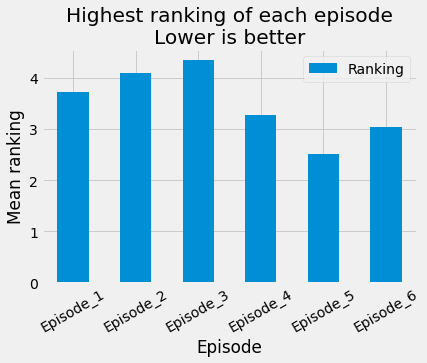

In [33]:
## Find the mean ranking:
#1. Create a new dataframe of ranking
cols_ranking = starwar.columns[9:15]
rank = starwar.copy()[cols_ranking]

#2. Compute the mean:
mean_rank = rank.mean()

#3. Plot the rank:
tick_name = []
for i in range(1,7):
    tick_name.append('Episode_{}'.format(i)) #Define the ticks name

mean_rank.plot.bar(legend=True, label='Ranking', rot=30)
plt.xticks(ticks=range(0,6), labels=tick_name)
plt.xlabel('Episode')
plt.ylabel('Mean ranking')

plt.title('Highest ranking of each episode\nLower is better')
plt.show()

We've got the first result: __The Episode V (`The Empries Strike Backs`)__ is the episode with highest ranking (by the survey's attendance - __as low as best__)

Now, let's look into something more deeper, like:
- _Is there the ranking is effect by `Age`?? by `Education`?? or by `Location`???_

To do that, we'll do below: 
- Check the unique value for each field above, and clean (if need)
- Aggregate data by each of these field (into each new df)

__2: Clean data__

In [34]:
## Check the unique value:
#1. Create the list unique value
age_value = []
education_value = []
location_value = []

array = [-1, -2, -4]
for name in starwar.columns[array]:
    if name == 'Age':
        age_value.append(starwar[name].value_counts(dropna=False).sort_index())
    elif name == 'Education':
        education_value.append(starwar[name].value_counts(dropna=False).sort_index())
    else:
        location_value.append(starwar[name].value_counts(dropna=False).sort_index())
        
#2. Create the dic store data:
store = {}
list_data = [age_value, education_value, location_value]
list_name = ['Age', 'Education', 'Location']
for item, value in zip(list_name, list_data):
    store[item] = value

store

{'Age': [18-29    218
  30-44    268
  45-60    291
  > 60     269
  NaN      140
  Name: Age, dtype: int64],
 'Education': [Bachelor degree                     321
  Graduate degree                     275
  High school degree                  105
  Less than high school degree          7
  Some college or Associate degree    328
  NaN                                 150
  Name: Education, dtype: int64],
 'Location': [East North Central    181
  East South Central     38
  Middle Atlantic       122
  Mountain               79
  New England            75
  Pacific               175
  South Atlantic        170
  West North Central     93
  West South Central    110
  NaN                   143
  Name: Location (Census Region), dtype: int64]}

In [35]:
# Check the missing value of each field:
starwar[starwar['Age'].isnull()]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,han_solo,luke_skywalker,princess_leia_organa,anakin_skywalker,obi_wan_kenobi,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c-3p0,r2_d2,jar_jar_binks,padme_amidala,yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
11,3.292638e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,3.292635e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,3.291669e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,3.291650e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
97,3.291570e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,3.288512e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1140,3.288460e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1142,3.288459e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1144,3.288456e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see the odd thing here:
- Some of answer said that they've seen at least 1 in 6 episode, but in the check-box for seen or not: they have not give their answer
- In the same records, they don't have any respond for any of question

=> In order to get this odd thing clearly, we will use heatmap to check the missing value on this case, with _the missing value_ is show by __light color__, and the data pattern shown as __black color__

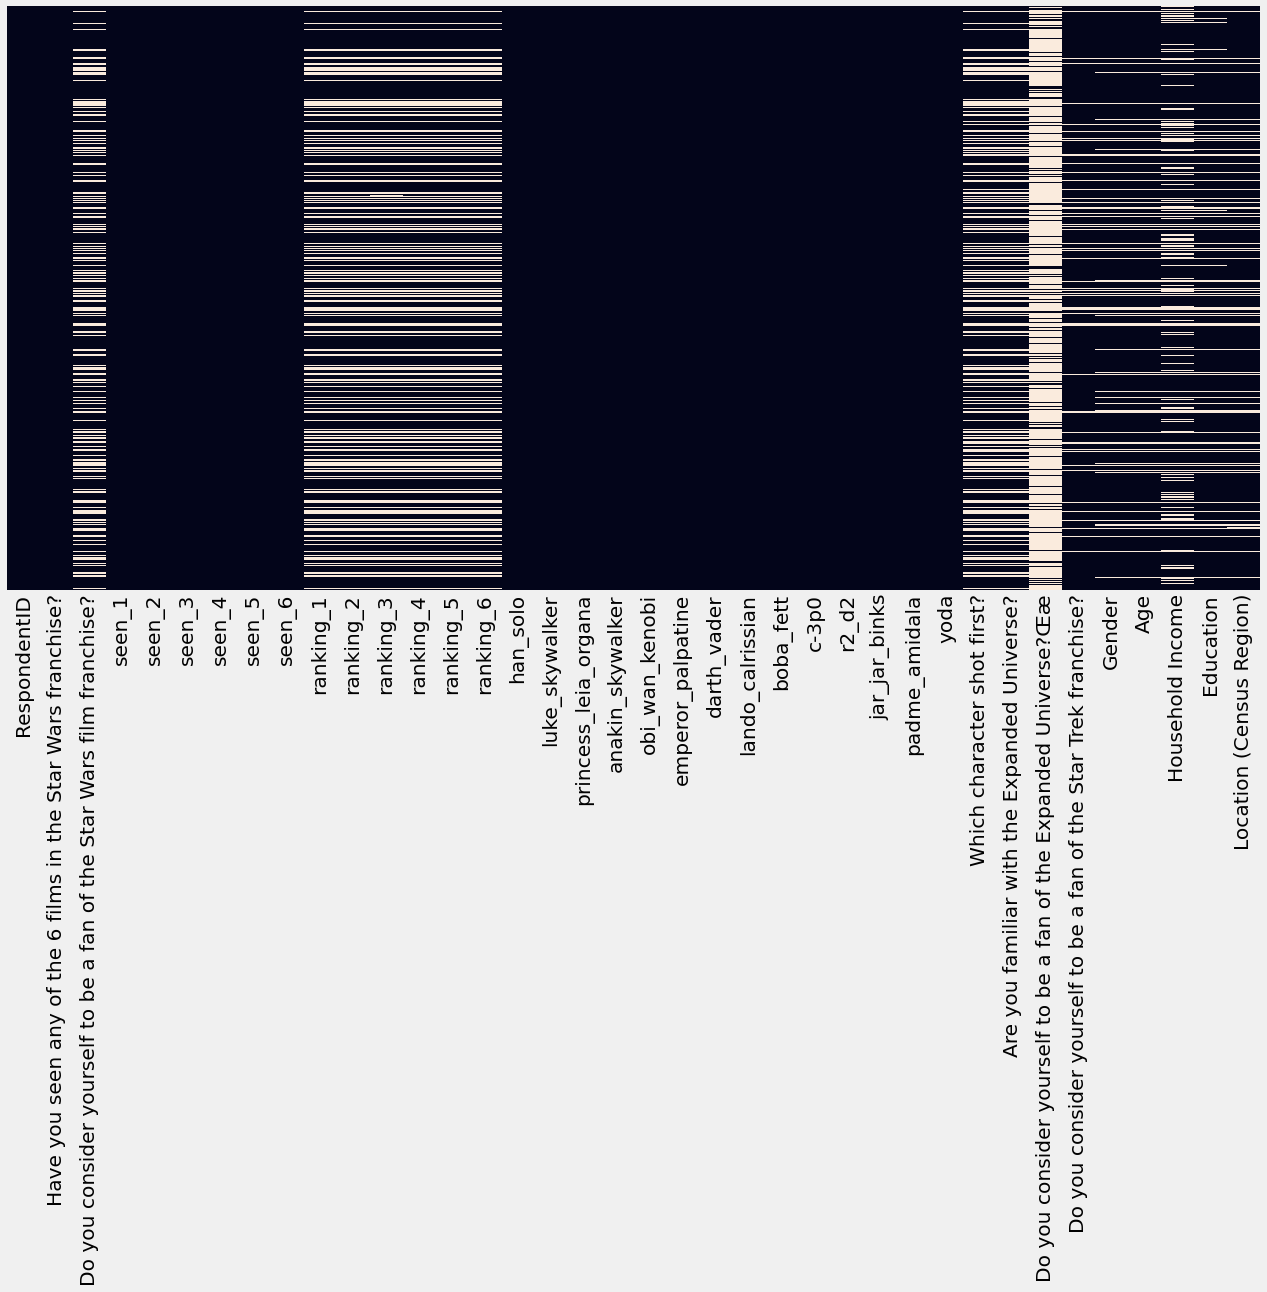

In [36]:
# Check missing value by heatmap graph:
#1. Import seaborn library:
import seaborn as sns      

# #3. Get the graph
def plot_null(df):
    # Modify the frame
    plt.figure(figsize=(20,10))
    # Identify the data
    data = df.isnull()
    #Plot
    sns.heatmap(data, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    
plot_null(starwar)

We can see that:
- Wherever the `Age` have missing value, __it will be missing at the other field too__, except `actor_favourite` field ( `han_solo` to `yoda`) because we've convert both `Unfimiliar` and `NaN` to `D` rank => If we remove the missing at `Age`, we don't get any loss data at the other field
- To the field: `Do you consider yourself to be..`, we will convert all the missing value and `No` to be `False`, and analyze it, due to the missing pattern/ data pattern at two field have the signification different.

=> We will remove all the missing at `Age` field.

In [37]:
# Remove the missing value at Age field:
starwar.dropna(subset=['Age'], inplace=True)

For the `Education` field, we can see the missing case almost same the `Age`, and we have get rid of almost these missing value. With the remain missing, we'll find the correlation between `Age` field and `Education` field, and then fill with the co-respone of `Age` value.

For the `Household Income`, we will put it later.

In [38]:
# Find the correlation of `Age` and `Education` field:
col_c = ['Age', 'Education']
print(starwar[col_c].notnull().corr())

# Find the value of Education co-respond with `Age`:
starwar[col_c][starwar['Education'].isnull()]

           Age  Education
Age        NaN        NaN
Education  NaN        1.0


,Age,Education
25,18-29,NaN
33,18-29,NaN
88,> 60,NaN
93,18-29,NaN
263,45-60,NaN
415,45-60,NaN
527,30-44,NaN
673,30-44,NaN
823,45-60,NaN
929,> 60,NaN


Since for correlation between 2 field `Age` and `Education` is None (and for `Location` too) => It's better not to fill in, considering by the size of missing value is 10 records of `Education`, and the number of records remain after delete these 10 case is not have large effect

=> Let's delete these missing value at `Education` too, and we will delete out in `Location` if any.

In [39]:
#Check the `Location` missing value:
print(starwar.iloc[:,-1].isnull().sum())

# Delete the missing record in `Education`:
starwar.dropna(subset=['Education'], inplace=True)

3


In [40]:
# Delete the missing record in `Location`:
starwar.dropna(subset=[starwar.columns[-1]], inplace=True)

In [41]:
# Check for the missing value at 3 field we modify:
num = [-1, -2, -4]
order = starwar.columns[num]

starwar[order].isnull().sum()

Location (Census Region)    0
Education                   0
Age                         0
dtype: int64

The last cleaning on this chapter is for `Gender`, but if look back the missing value detect graph, we get the observe that almost the missing records in `Age` is in `Gender` too; so, for the remain missing value (if any), we can get rid of it now without worry about the loss of data.

In [42]:
# Check the missing value at `Gender`:
starwar['Gender'].isnull().sum()

0

Luckily, the supposing was True, all the missing value in `Gender` was blown away along with `Age` when cleaning `Age` field. Now, let's jump to analysis by:
- Education, age, Location (first, to expand the analysis result for the ranking of each episode above)
- Gender

For the next analysis step, we have some way to perform the aggregate data by: 
1. `Age` + `Gender` (aggerate by `Age` and filter by `Gender`)
2. `Location` + `Age` or `Garden` + `Location`

__3: Discover the highest ranking Episode by `Age` + `Gender`__

We've look at the graph above and see what's episode is received the highest ranking __(as low as best)__ => Let's look behind the curtain, we want to know: 
- `Male` and `Female`, between each group of `Age`, __what's the group have the most attendance??__ => This result to determine the most result (bad or good) from what's group.
- __What's the average ranking point for the Episode__ that each group give to the Episode?? => This result can be use to answer one pattern for the ranking we got above in the bar chat.

In [43]:
#Check the 'gender' value:
starwar['Gender'].value_counts(dropna=False)

Female    545
Male      489
Name: Gender, dtype: int64

In [44]:
# Aggregate by 'Age'
age_group = starwar.copy().groupby('Age')

#Filter by `Male`:
age_male = age_group.apply(lambda x: x[x['Gender']=='Male'])
rank_by_male = age_male[age_male.columns[9:15]]
# Input sum ranking of each age group:
sum_rank_by_male = rank_by_male.reset_index().groupby('Age').agg(np.sum)
result = sum_rank_by_male['ranking_5']
        
#Filter by `Female':
age_female = age_group.apply(lambda x: x[x['Gender']=='Female'])
rank_by_female = age_female[age_female.columns[9:15]]
# Input sum ranking of each age group:
sum_rank_by_female = rank_by_female.reset_index().groupby('Age').agg(np.sum)
result_2 = sum_rank_by_female['ranking_5']

In [45]:
def plot_the_pie(series_1, series_2, df, title_1, title_2, col_name):
    
    # Define data for each group:
    group_1 = list(series_1)
    group_2 = list(series_2)

    # Create explode data:
    explodes = [0.2, 0, 0.3, 0]

    # Create auto pct funct:
    def get_pct(pct, data):
        result = int(pct / 100.*np.sum(data)) ##formula: percentage/100 * sum(data) = item in data
        return ("{:.1f}% \n {}".format(pct, result))
    # Create wedge properties:
    wd = {'linewidth': 1, 'edgecolor':'black'}
    # Create label:
    key = list(df[col_name].unique())

    # Plot the pie:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
  
    # For male group  
    wedges, texts, autotexts = ax1.pie(x=group_1,
                     autopct= lambda pct: get_pct(pct, group_1),
                     explode = explodes,
                     wedgeprops=wd,
                     colors=['cyan','pink','violet','green'],
                     labels=key,
                     startangle=90)
    ax1.legend(wedges, key, title='Age',loc=6, bbox_to_anchor=[1,1]) #Set legend box
    plt.setp(autotexts, size = 12, weight ="bold")
    ax1.set_title('{}'.format(title_1)) # Set title
    
    # For female group
    wedges, texts, autotexts = ax2.pie(x=group_2,
                     autopct= lambda pct: get_pct(pct, group_2),
                     explode = explodes,
                     wedgeprops=wd,
                    colors=['cyan','pink','violet','green'],
                     labels=key,
                     startangle=90)
#     ax2.legend(wedges, key, title='Age', loc=6, bbox_to_anchor=[1,1])
    plt.setp(autotexts, size = 12, weight ="bold")
    ax2.set_title('{}'.format(title_2))
    plt.show()

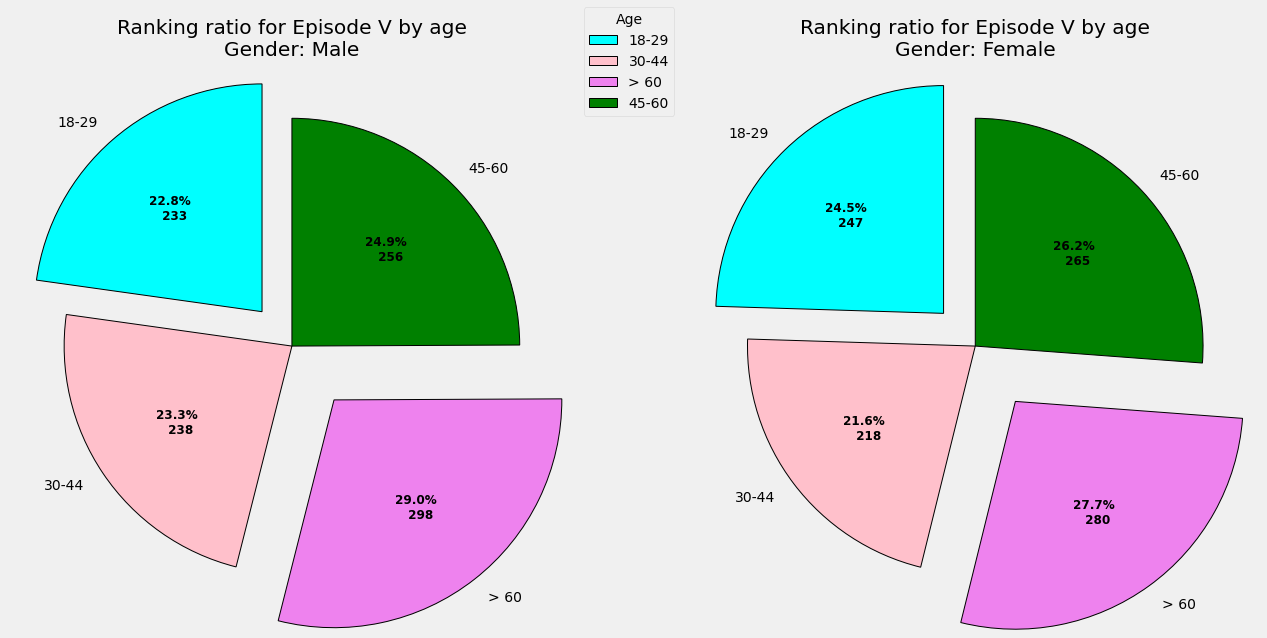

In [46]:
plot_the_pie(result, result_2, starwar, 
            'Ranking ratio for Episode V by age\nGender: Male', 'Ranking ratio for Episode V by age\nGender: Female',
            'Age')

Look at the graph, we can get the overview for our attendance:
- The mostly votes from the Senior __(above 60 years old)__, and we got the votes of men more than women
- The second one is from Tricenarian group __(45-60)__, but this times women's votes more than men
- The last one is for Teenage/Pre-middle age and Middle age group, with the raio votes is opposite of each other. 

After got the ranking ratio, we can focus on the average point that they are ranking for this Episode, and make the bar chart to see what's happend.

In [47]:
## Get the mean point of each gender:
#Male:
mean_rank_by_male = rank_by_male.reset_index().groupby('Age').agg(np.mean)
mean_1 = mean_rank_by_male['ranking_5']

#Female:
mean_rank_by_female = rank_by_female.reset_index().groupby('Age').agg(np.mean)
mean_2 = mean_rank_by_female['ranking_5']

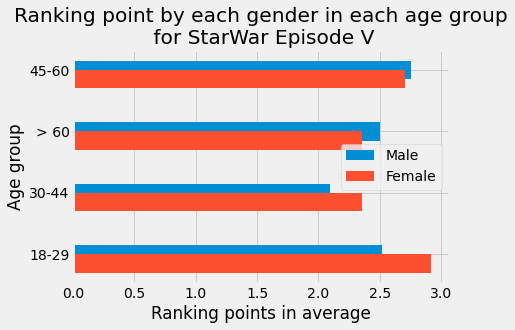

In [48]:
#Plot the bar chat:
plt.barh(y = list(starwar['Age'].unique()),width = list(mean_1), label='Male', height=0.3)
plt.barh(y = list(starwar['Age'].unique()),width = list(mean_2), align='edge', height=-0.3, label='Female')

plt.yticks(ticks=np.arange(0,4), labels=list(starwar['Age'].unique()))
plt.xlabel('Ranking points in average')
plt.ylabel('Age group')

plt.legend()
plt.title('Ranking point by each gender in each age group\n for StarWar Episode V')
plt.show()

Compare with the above pie chart ranking vote number ratio, we should divide the result to 2 area: __Love__ and __uhh, normal__:
- __Love group__: We have a lot of thing to say:
1. The love group contain only __Mr.__ with age in __`30-44`__, so _it's the only group by `Age` 'save' the ranking points of Episode V_
2. The group that have a quite lot of number who ranking for this Episode: `>60` - though they still like it, __but the ranking score seem as quite as between love and normal__. In other words, if our Mr. in `30-44` like this Episode so much - then - our Mr. in Senior group seem like feel a quite pale taste than age group `30-44`
- __urghh, normal__: 
1. Group of `18-29`: The average point that Ms./Mrs. ranking is closer to 3.0, worse than Mr.'s (2.5) => It seem like our __Ms./Mrs. attendance not interest too much in the episode.__
2. Group of `45-60`: Both Mr. and Mrs.'s result is greater than 2.5 (between 2.5 and 3.0) => __Our attendance don't feel like they get a very good taste from the episode, the feeling is urghh, normal, normal and normal.__

__4: Expand for `Location`, what's the region with the best ranking for this episode??__

In order to expand the result, we will discover it by what does the ranking ratio by `Location`? We will perform the two chart: _Pie chart_ for know the raking ratio distribution for each region, and _Bar chat_ to discover the average ranking point that each region has gave out to the episode. Our purpose is:
- Answer the question: __The mostly result come from what's region?__
- Evaluate the result (average ranking point): __Is the area with mostly result come from will affect the over-all result__?

In [49]:
## Aggregate data:
location = starwar.copy().groupby(starwar.columns[-1])

## Ranking ratio of each region:
sum_by_location = location.agg(np.sum)
to_piechart = sum_by_location['ranking_5']
## Average ranking point by each region:
mean_by_location = location.agg(np.mean)
to_barchart = mean_by_location['ranking_5']

In [50]:
def plot_the_pie_and_bar(data_to_piechart, data_to_barchart,
                        num_cols , jud_num, df,title_of_legend,titl_piechart,titl_xlabel,titl_barchart,
                         greater_or_less='greater'):
    
    # Get the data:
    piechart = list(data_to_piechart)
    barchat = list(data_to_barchart)
   # Define pce func for piechart:
    def get_func(pct, data):
        result = int(pct/100*np.sum(data))
        return ('{:.1f}% \n {} votes').format(pct, result)
    # Define wedge props:
    wd = {'linewidth':1, 'edgecolor':'black'}
    # Define labels:
    key = list(starwar[starwar.columns[num_cols]].unique())

    #Plot process:
    #1. Define the frame:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
    #2. Plot the pie chart:
    wedges, texts, autotexts = ax1.pie(x=piechart,
                                  autopct= lambda pct:get_func(pct,piechart),
                                  
                                  
                                  startangle= 90,
                                  wedgeprops=wd)
    ax1.legend(wedges, key, title='{}'.format(title_of_legend), loc=6, bbox_to_anchor=[-0.3, 0.8])
    plt.setp(autotexts, size=12, weight='bold')
    ax1.set_title('{}'.format(titl_piechart))
    #3. Plot the bar chart:
    if greater_or_less=='greater':
        color_def = data_to_barchart>jud_num #To filter the region with ranking point greater than 2.5
        color_def_fil = color_def.map({True:'orange', False:'grey'})
        ax2.barh(y=np.arange(1,len(barchat)+1), width=barchat, align='center', color=color_def_fil)
    else:
        color_def_2 = data_to_barchart<jud_num
        color_def_fil_2 = color_def_2.map({True:'green',False:'grey'})
        ax2.barh(y=np.arange(1,len(barchat)+1), width=barchat, align='center', color=color_def_fil_2)
    ax2.set_yticks(np.arange(1,len(barchat)+1))
    ax2.set_yticklabels(key)
    ax2.set_xlabel('{}'.format(titl_xlabel))
    ax2.set_title('{}'.format(titl_barchart))

    plt.show()

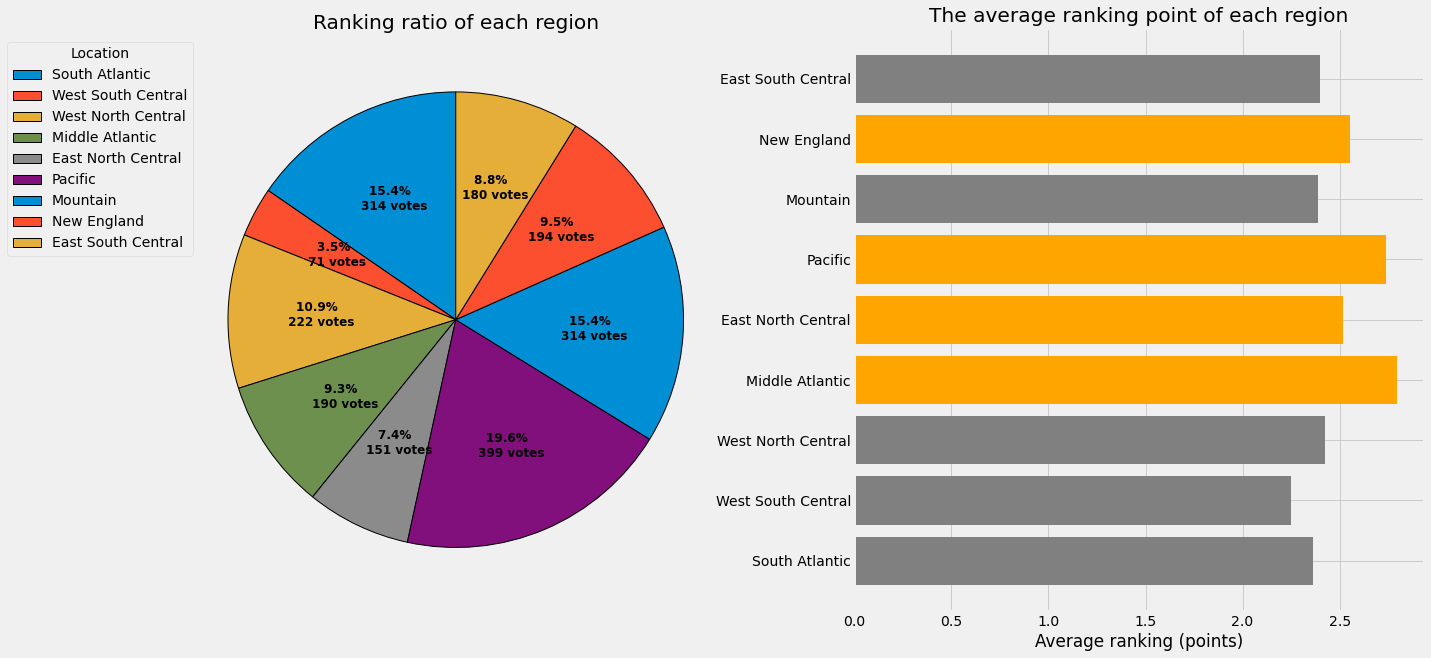

In [51]:
plot_the_pie_and_bar(to_piechart, to_barchart, -1, 2.5, starwar,
                     'Location', 'Ranking ratio of each region', 'Average ranking (points)',
                     'The average ranking point of each region', 'greater')

For the convient, the region with __average ranking point greater than 2.5__ had been marked as Orange color, and look at the result, we got:
- __The most votes__ from __the Pacific__ region, and sadly they __ranked it as greater than 2.5 points__ (approximately 2.7 points). __The two second votes__ from __Mountain and South Atlantic__, though they __ranked it__ less than 2.5 points but __closely to 2.5 points__ (2.4 points) => This result somewhat can light out the reason of the current ranking for Eposide V of StarWar, __not as normal__, but somewhat __in certain region, it's just urrgh normal__
- The three remain region with the score greater than 2.5 points is __East North Central, Middle Atlantic and New England__, with the ratio position is __8th (7.4%), 6th (9.3%) and 7th (8.8%)__
- The rest is ranking as less than 2.5 points and place closer to average of 2.0 and 2.5.
- The region give __the highest ranking__ only __West South Central__, but it place a last end position in the distribution ratio of number regions ranking (3.5%)

Connect with the result of `Age` and `Gender` we have Mr. in age `30-44` love this episode. __Is there their sign in the West South Central?__ Let's do the quick bar chat to see the average ranking they gave for this Episode.

In [52]:
## Aggregate data by Location: West South Central
west_south = location.get_group('West South Central')

##Filter by `Male` and give it the average points:
west_south_male = west_south[west_south['Gender']=='Male']
ranking_by_age_west_south_male = west_south_male.groupby('Age')[west_south_male.columns[9:15]]
mean_ranking = ranking_by_age_west_south_male.agg(np.mean)

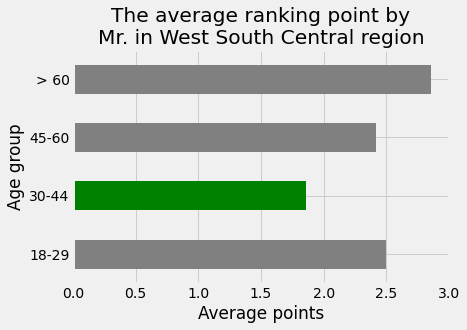

In [53]:
## Plot the barchart:
color_bar = mean_ranking['ranking_5']<2
color_fill = color_bar.map({True:'Green', False:'Grey'})

mean_ranking['ranking_5'].plot.barh(color=color_fill)
plt.xlabel('Average points')
plt.ylabel('Age group')

plt.title('The average ranking point by\nMr. in West South Central region')
plt.show()

Sound like we've captured them, __the fan of Eposide V StarWar is Mr. in Worth South Central in age of `30-44`__, and sadly that's only them like this Episode and love it in fantasy way. Even in their region, and same gender, our Senior get it like urrgh normal, the rest is oh, it's good, but not in love too much.

Because we've captured the fan of this Episode, __let's see what's their favour charachters__. About the seen total for each episode, we will put it after the next analysis below, because we can get a invidual topic about this theme

__CONCLUSION__:
- __The fan of Episode V: The Empire Strikes Back__ is exists, it __is group of Mr. whose age in range `30-44` at `West South Central`__
- Almost the feeling of everyone is from `Somewhat Favourable` to `Normal`, especially people whose age in range `45-60` and `18-29`, the group `above 60` is equal fine
- __The mostly votes come from `Pacific`, but they don't feel very fantastic with this Episode.__

# About the favourite characters: What's the taste of the fan Episode V? 

We can sure one thing: Only the fan of Episode V can get crazy for their characters, and now, __let's get started with our Mr. attendance in West South Central region__. 

In [54]:
# Create the condition:
con_1 = starwar['Gender'] == 'Male'
con_3 = starwar['Age'] == '30-44'
total = con_1&con_3

#Filter the data:
start_1 = starwar.copy()[total]
start_2 = start_1[start_1[starwar.columns[-1]]=='West South Central']
compute = start_2[start_2.columns[15:29]]
# Compute the mean:
favour_1 = compute.mean()

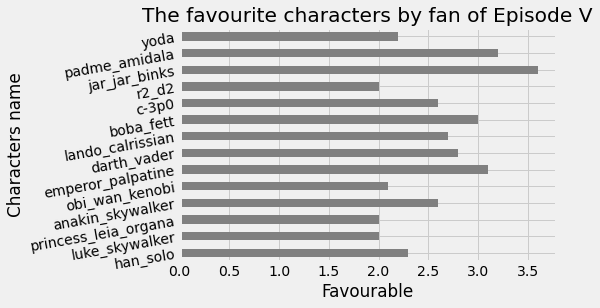

In [55]:
#Plot the bar chart:
#Define color bar:
color_fil = favour_1<2
color_tab = color_fil.map({True:'green', False:'grey'})

favour_1.plot.barh(color = color_tab, rot=10)
plt.xlabel('Favourable')
plt.ylabel('Characters name')

plt.title('The favourite characters by fan of Episode V')
plt.show()

Among many character here, all of them is in degree `Somewhat Favourable` to `Normal` => We still can't say about what's the most favourable characters in these group.

We're already find the taste of the fan Episode V, now __let's take it back to their region__, to see what's the favourite character. We are expecting the result is not different than these because all of the rest have feeling of 50:50, so they likely not focus on any character.

In [56]:
#Filter the data:
west_south_charac = west_south.loc[:,starwar.columns[15:29]]
mean_favou = west_south_charac.agg(np.mean)

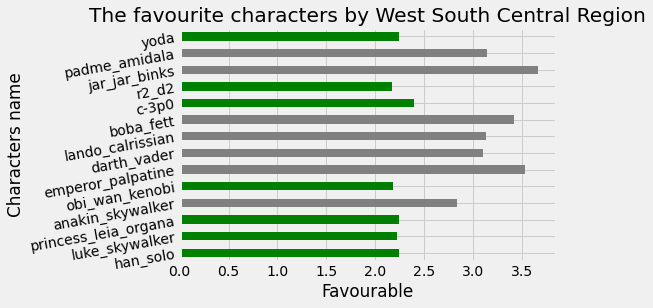

In [57]:
#Plot the bar chart:
#Define color bar:
color_fil_2 = mean_favou<2.5
color_tab_2 = color_fil_2.map({True:'green', False:'grey'})

mean_favou.plot.barh(color = color_tab_2, rot=10)
plt.xlabel('Favourable')
plt.ylabel('Characters name')

plt.title('The favourite characters by West South Central Region')
plt.show()

We still got 7 familiar names like above, but this time, all of them is in degree `Somewhat Favourable`. Let's check the optional item: All the Ms/ Mrs in West South Central Region, and finally we dig into all of data to confirm one thing:
_Because the ranking for this film is not much as too much loving (above 2, closer to 2.5 points) => the favourite for each character if any is not higher_, we can expect it as `Somewhat Favourable`

In [58]:
#Aggregate data by Ms/ Mrs:
west_south_female = west_south[west_south['Gender']=='Female']

# Compute the mean case 1: Ms/ Mrs in West South Central
female_favour_char = west_south_female[starwar.columns[15:29]].mean()

#Case 2: Get all the mean favour in data
cal_rec = starwar[starwar.columns[15:29]]
cal_mean = cal_rec.mean()

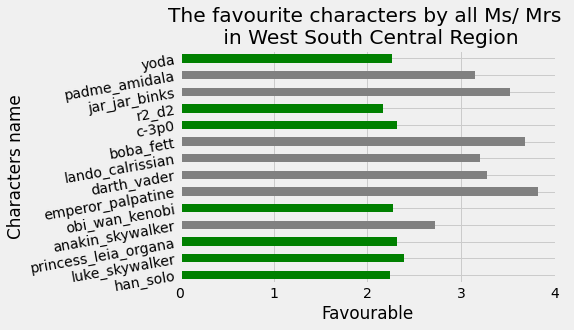

In [59]:
#Plot the bar chart for case 1
#Define color bar:
color_fil_3 = female_favour_char<2.5
color_tab_3 = color_fil_3.map({True:'green', False:'grey'})

female_favour_char.plot.barh(color = color_tab_3, rot=10)
plt.xlabel('Favourable')
plt.ylabel('Characters name')

plt.title('The favourite characters by all Ms/ Mrs \n in West South Central Region')
plt.show()

The result we see here is the same result in the graph above when we research for West South Central Region. Obvious that because so many people, contain our Ms/ Mrs not much interest in Eposide V, so the favourite ranking somewhat effect by this factor.

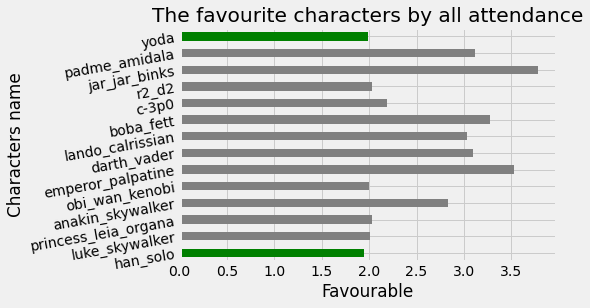

In [60]:
#Plot the bar chart for case 1
#Define color bar:
color_fil_4 = cal_mean<2
color_tab_4 = color_fil_4.map({True:'green', False:'grey'})

cal_mean.plot.barh(color = color_tab_4, rot=10)
plt.xlabel('Favourable')
plt.ylabel('Characters name')

plt.title('The favourite characters by all attendance')
plt.show()

For this finally test, the result was set to _show only those have favourable raking less than 2_ (closer to `Somewhat Favourable`), and we got 2 characters: `Han-Solo` and `Yoda`. __About `Han-Solo`, along with `Yoda`, we will find only those records with these two characters have favourable ranking less than 2 to see in what region, and which group of age, gender like these two character.__

In [61]:
## Get the data only for characters got favourite point (less than 2.0)
favour_cha = starwar.copy()[(starwar['han_solo']<2)|(starwar['yoda']<2)]

## Aggregate data:
#1. By location:
cha_loc = favour_cha.groupby(starwar.columns[-1])
favou_loc = cha_loc[starwar.columns[15:29]].agg(np.mean)
sum_favour_loc = cha_loc[starwar.columns[15:29]].agg(np.sum)

#2. By Age and Gender:
cha_age = favour_cha.groupby(starwar['Age'])
cha_gender = favour_cha.groupby(starwar['Gender'])

In [62]:
# Prepare data:
#Case 1: For `Han-Solo`
to_piechart_case1 = sum_favour_loc['han_solo']
to_barchat_case1 = favou_loc['han_solo']

#Case 2: For 'Yoda':
to_piechart_2 = sum_favour_loc['yoda']
to_barchart_2 = favou_loc['yoda']

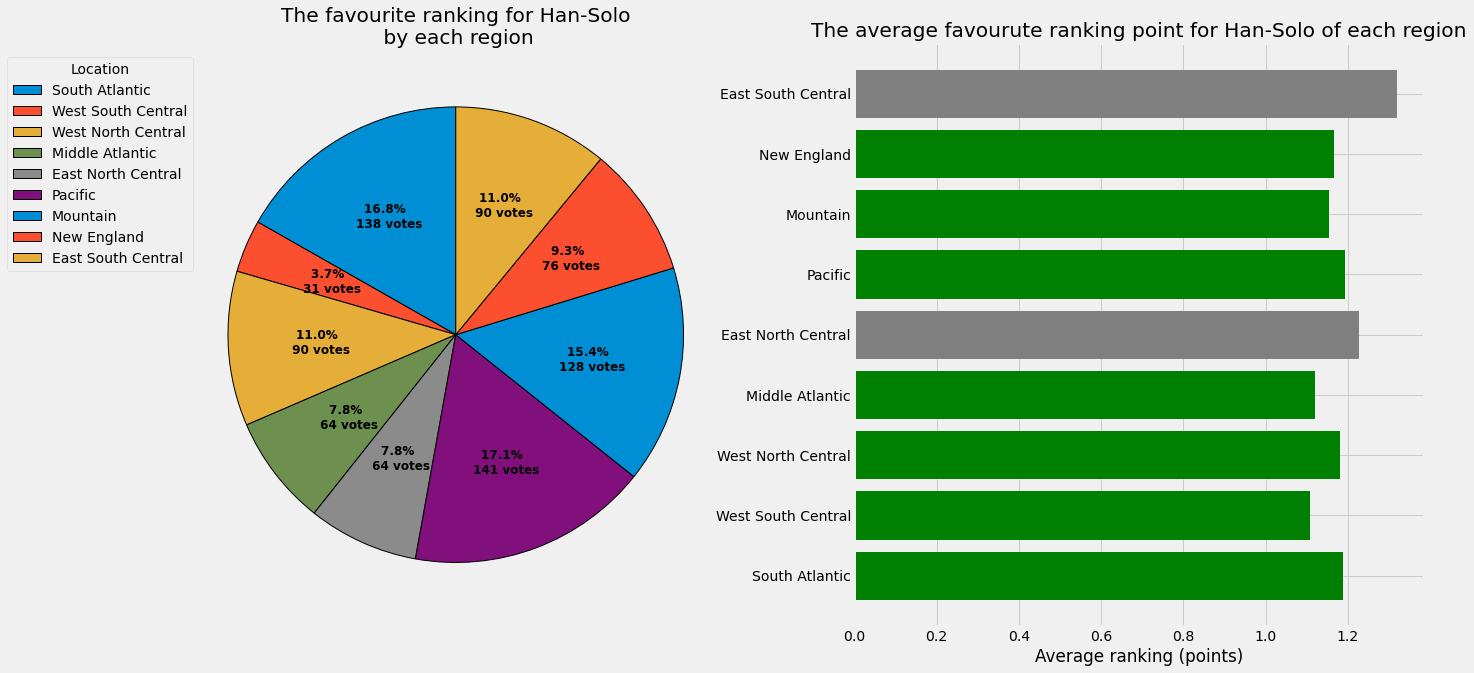

In [63]:
plot_the_pie_and_bar(to_piechart_case1, to_barchat_case1, -1, 1.2, starwar,
                     'Location', 'The favourite ranking for Han-Solo\n by each region', 
                     'Average ranking (points)',
                     'The average favourute ranking point for Han-Solo of each region', 'less')

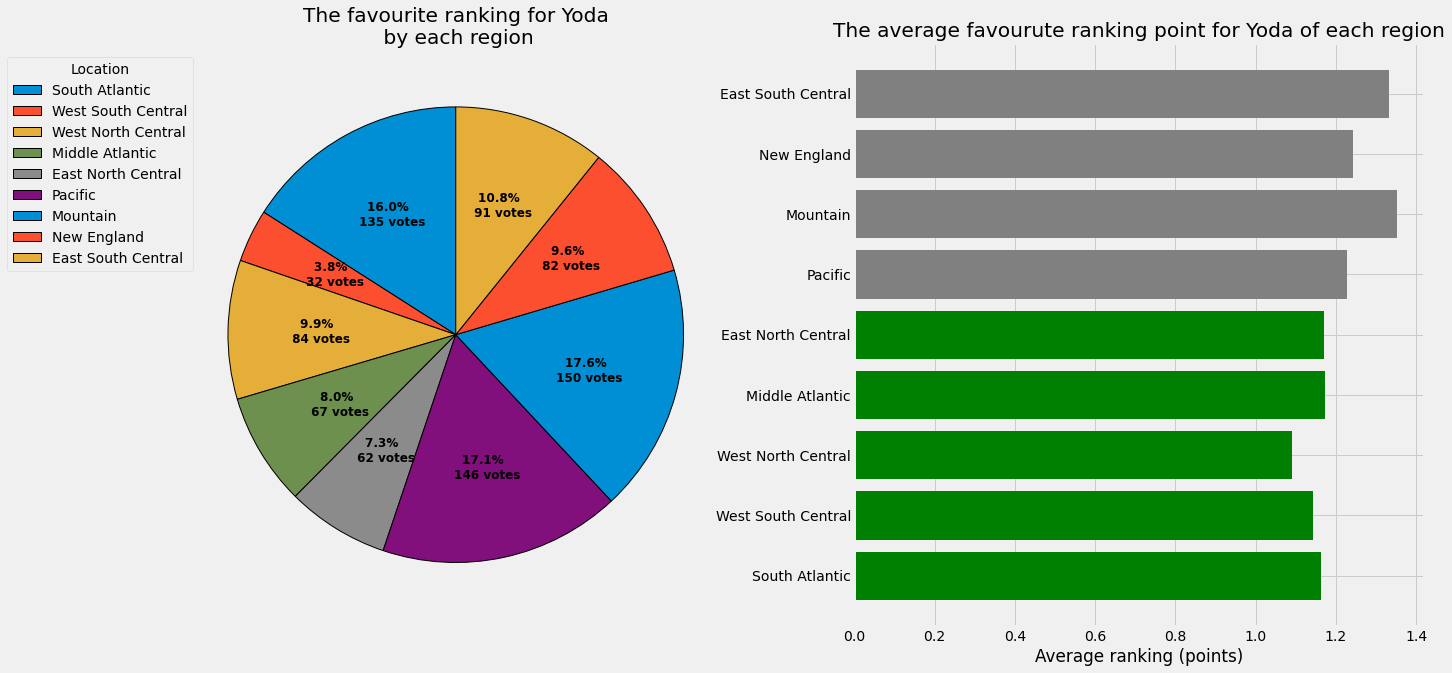

In [64]:
plot_the_pie_and_bar(to_piechart_2, to_barchart_2, -1, 1.2, starwar,
                     'Location', 'The favourite ranking for Yoda\n by each region', 
                     'Average ranking (points)',
                     'The average favourute ranking point for Yoda of each region', 'less')

Before we get the conclusion, let's see how much records we have for the favourite of `Han-Solo` and `Yoda`, and notes that __the result we got__ is after we filter __only records with favourite ranking points for `Han-Solo` and `Yoda` is less than 2 points__:

In [65]:
#Check the number of records after filter:
total = favour_cha.shape[0]
total_data = starwar.shape[0]
ratio = (total/total_data)*100

print('The number of records for Han-Solo and Yoda = {}'.format(total))
print('The prop votes for Han-Solo and Yoda = {:.1f}%'.format(ratio))

The number of records for Han-Solo and Yoda = 698
The prop votes for Han-Solo and Yoda = 67.5%


Let's imagine that in 100% our attendance, we've got 67,5% among them like `Han-Solo` and `Yoda` _(it is True even to the Fan of Episode V)_. Now for the group of 67,5%, let's say that we will make it become a different group called `Group love Han-Solo and Yoda` with the percentage is 100%. Let's get started:
- For `Han-Solo`: this character seem to populate with more countries than Yoda, it contains: __`New England`__, __`Mountain`__, __`Pacific`__,`Middle Atlantic`,`West North/West South Central`,`South Atlantic`.
- For `Yoda`: We got these contries list love this character: __`East North Central`__, `Middle Atlantic`, `West North/West South Central`, `South Atlantic`.
- Note that the countries with Bold syntax is the countries that prefer this character but not in the list of the remain character, ex: `Pacific` is prefer `Han-Solo` than `Yoda`, and so on.
- The highest votes ranking ratio for `Han-Solo` is from `Pacific` region, and this is also the region love this character
- The highest votes ranking ratio for `Yoda` is from `Mountain`, but as not lucky as `Han Solo`, the Mountain region have a little less prefer `Yoda`. We also have `Pacific` is the second one, but the result is same as `Mountain`.

We've got the list of which regions love which characters, now let's dig deeper into the representation regions by this rule: We will pick the regions which __have mostly votes__ for the character, __with the good ranking__ for the character. By this rule, we will pick `Pacific` for `Han-Solo` and `South Atlantic` for `Yoda`, to answer the question: __In these region, how many people by `Gender` and `Age` love their character?__

In the end of this pattern analysis, we will back to the fan of Episode V and see the bar chart for the further analysis.

In [66]:
# Prepare data for `Pacific`
pacific_cha_age = cha_age.apply(lambda g:g[g[g.columns[-1]]=='Pacific'])
pacific_cha_gen = cha_gender.apply(lambda y:y[y[y.columns[-1]]=='Pacific'])

## Compute the sum:
sum_pacific_cha_age = pacific_cha_age[starwar.columns[15:29]].reset_index().groupby('Age').agg(np.sum)
sum_pacific_cha_gender = pacific_cha_gen[starwar.columns[15:29]].reset_index().groupby('Gender').agg(np.sum)

## Compute the mean:
mean_pacific_cha_age = pacific_cha_age[starwar.columns[15:29]].reset_index().groupby('Age').agg(np.mean)
mean_pacific_cha_gen = pacific_cha_gen[starwar.columns[15:29]].reset_index().groupby('Gender').agg(np.mean)

In [67]:
#Prepare data for `South Atlantic`
south_cha_age = cha_age.apply(lambda z:z[z[z.columns[-1]]=='South Atlantic'])
south_cha_gen = cha_gender.apply(lambda j:j[j[j.columns[-1]]=='South Atlantic'])

##Compute the sum:
sum_south_cha_age = south_cha_age[starwar.columns[15:29]].reset_index().groupby('Age').agg(np.sum)
sum_south_cha_gen = south_cha_gen[starwar.columns[15:29]].reset_index().groupby('Gender').agg(np.sum)

##Compute the mean:
mean_south_cha_age = south_cha_age[starwar.columns[15:29]].reset_index().groupby('Age').agg(np.mean)
mean_south_cha_gen = south_cha_gen[starwar.columns[15:29]].reset_index().groupby('Gender').agg(np.mean)

In [68]:
#Prepare data to visualize:
#1. For Han Solo:
paci_pie_age = sum_pacific_cha_age['han_solo']
paci_pie_gen = sum_pacific_cha_gender['han_solo']
paci_bar_age = mean_pacific_cha_age['han_solo']
paci_bar_gen = mean_pacific_cha_gen['han_solo']
#2. For Yoda:
south_pie_age = sum_south_cha_age['yoda']
south_pie_gen = sum_south_cha_gen['yoda']
south_bar_age = mean_south_cha_age['yoda']
south_bar_gen = mean_south_cha_gen['yoda']

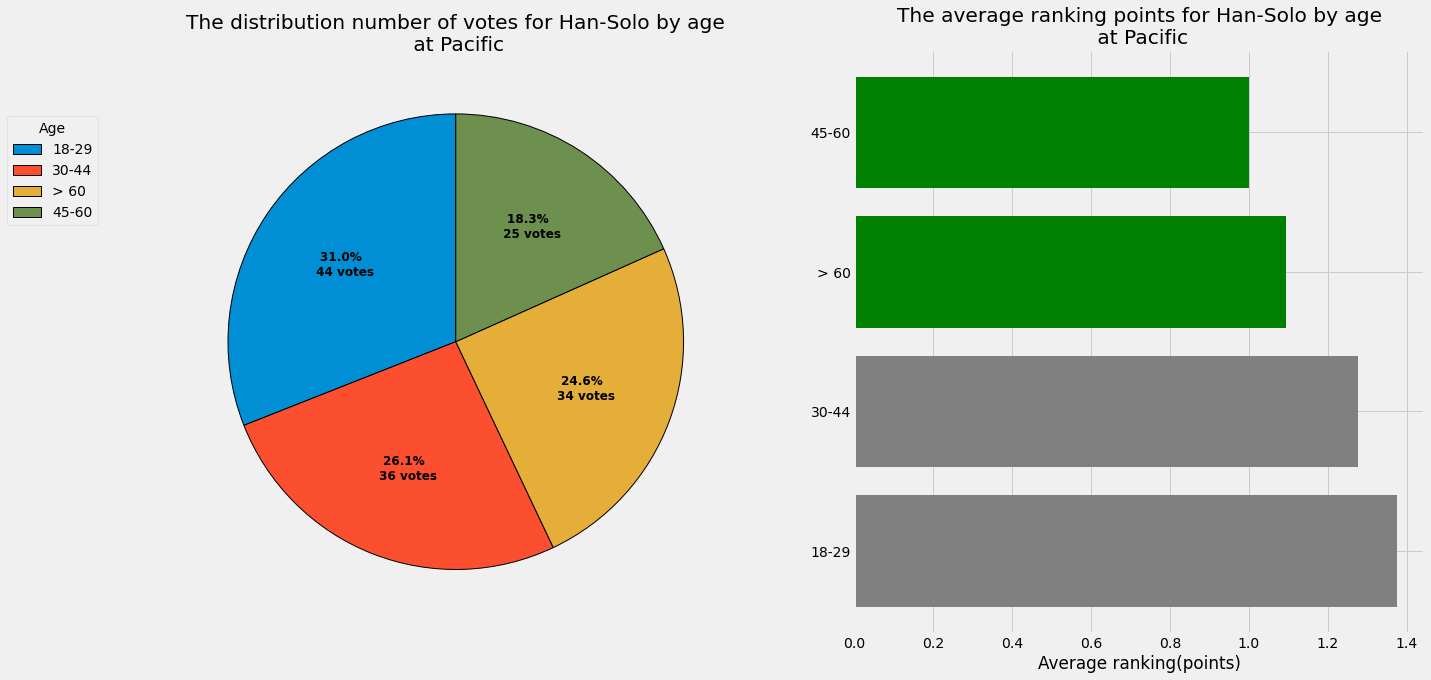

In [69]:
## Chart for Han Solo, Pacific, by Age
plot_the_pie_and_bar(paci_pie_age, paci_bar_age, -4,1.2, starwar,'Age',
                     'The distribution number of votes for Han-Solo by age\n at Pacific',
                    'Average ranking(points)','The average ranking points for Han-Solo by age\n at Pacific', 'less')

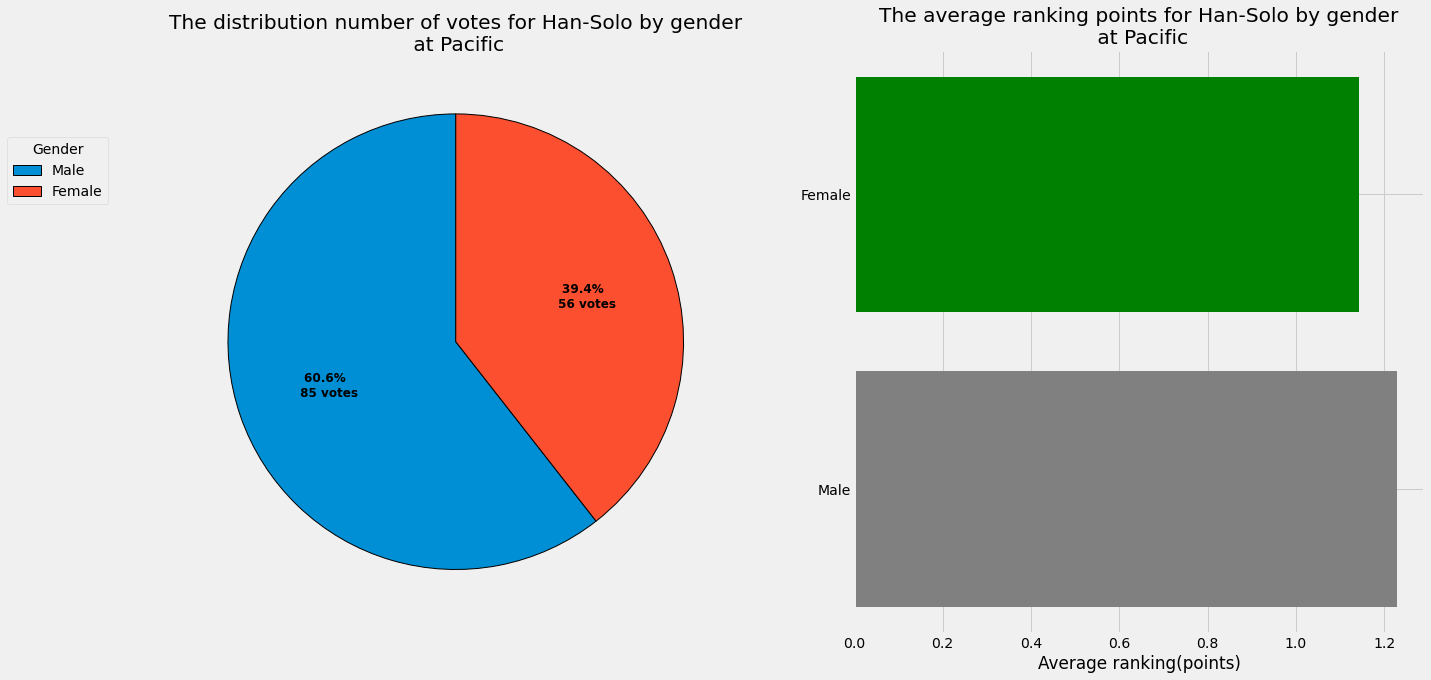

In [70]:
# Chart for Han Solo, Pacific, by Gender
plot_the_pie_and_bar(paci_pie_gen, paci_bar_gen, -5,1.2, starwar,'Gender',
                     'The distribution number of votes for Han-Solo by gender\n at Pacific',
                    'Average ranking(points)','The average ranking points for Han-Solo by gender\n at Pacific', 'less')

Note that all the result here is less than 2 points, _but in the specific group, we will compare the detail points (__less than 1.2 points__) to release what's the true fan of character_ (most love for the character). With that said, let's look at the result, we got:
- For `Age`: While the ranking points as closer to 1 points as loving the character, we have 59 votes from people above 45 years old => __Our older people seems to love `Han-Solo` than young people.__
- For `Gender`: In the average points result, __our Ms./ Mrs. seems loving `Han-Solo` more than our Mr.__. In other words, in the Group `Love Han-Solo` in Pacific, _the survey have Men as attendance more than Women, but the ranking points of Women is better than Men_.

Now, it's time to see the result at the side of `Yoda`

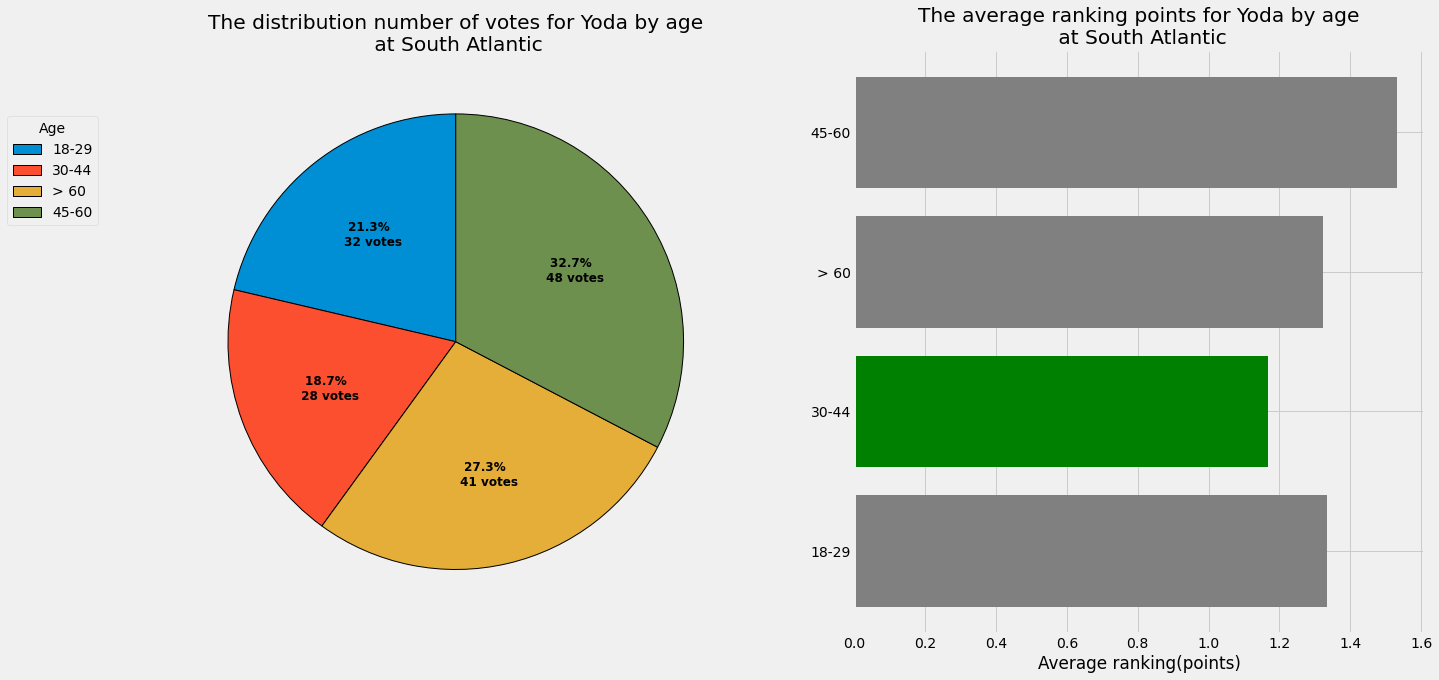

In [71]:
# Chart for `Yoda`, South Atlantic, by Age
plot_the_pie_and_bar(south_pie_age, south_bar_age, -4,1.2, starwar,'Age',
                     'The distribution number of votes for Yoda by age\n at South Atlantic',
                    'Average ranking(points)','The average ranking points for Yoda by age\n at South Atlantic', 'less')

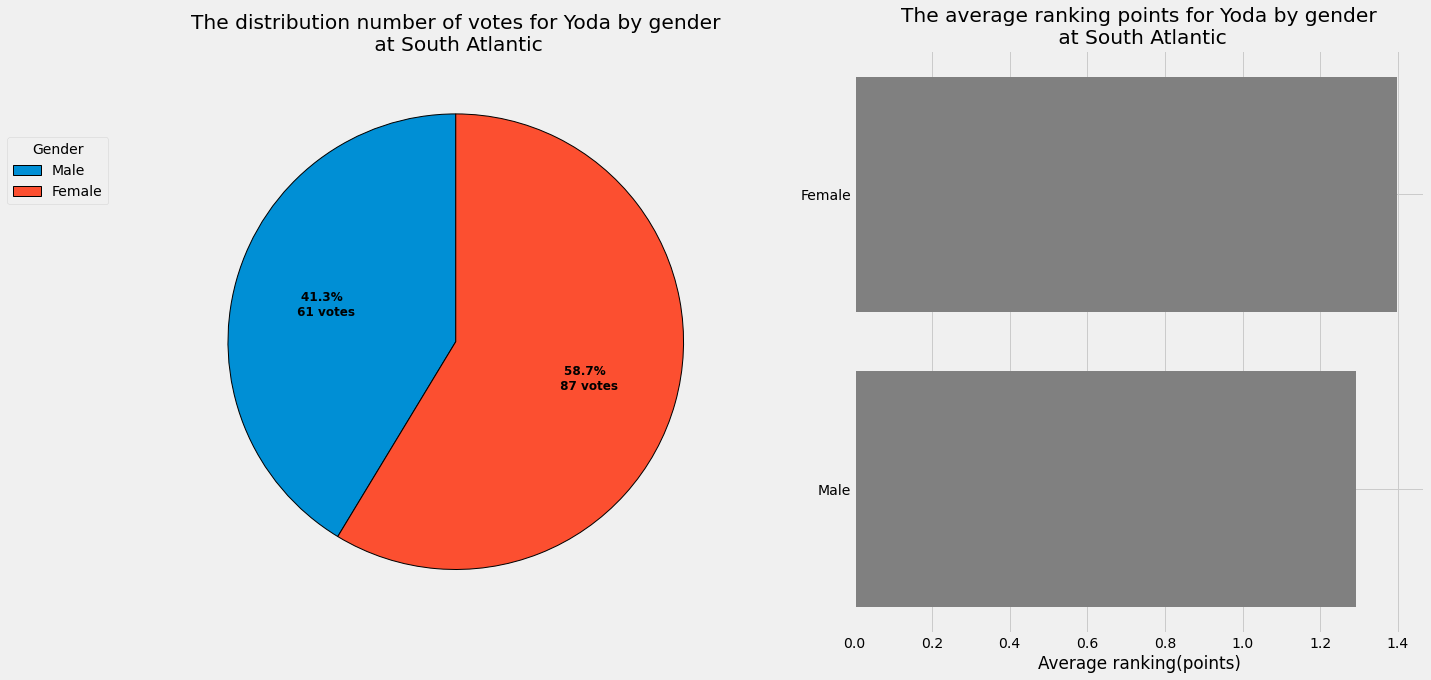

In [72]:
# Chart for `Yoda`, South Atlantic, by Gender
plot_the_pie_and_bar(south_pie_gen, south_bar_gen, -5,1.2, starwar,'Gender',
                     'The distribution number of votes for Yoda by gender\n at South Atlantic',
                    'Average ranking(points)','The average ranking points for Yoda by gender\n at South Atlantic', 'less')

We are looking at the completely opposite result for `Yoda` character:
- __Only people in age of `30-44` loving so much `Yoda`__, but their votes just 18,7% from 100% votes for `Yoda` that less than 2 points __in their region__. Especially, the group ages `45-60` have the mostly ranking votes ratio, but they ranking `Yoda` as 1.6 points (closer to `Somewhat Favourable`)
- None of both two `Genre` ranking `Yoda` as their mostly favourable character

=> The character `Yoda` though get the overall points less than 2 points, __but in the actually we can considering `Yoda` as ` Somewhat Favourable`__, depend in the actually result we have

_*Note: The overall points `Pacific` vote for `Han-Solo` not as better than `South Atlantic` vote for `Yoda`, and there is no bias sample (pick-up the side with better point from the first). So that, the different between favourable raking points of `Han Solo` and `Yoda` isn't the attemp to take down this character or vote up for that character._

Now, let's back to the fan of Episode V. We know that someone who had ranked for `Han-Solo` more than 2 points, so that the average overall is up over 2 points, let's see the bar chart to release this:

In [73]:
## Call back the data:
to_barchart_check = compute['han_solo']

## See the overview statistic:
to_barchart_check.describe()

count    10.000000
mean      2.300000
std       1.337494
min       1.000000
25%       1.000000
50%       2.000000
75%       3.750000
max       4.000000
Name: han_solo, dtype: float64

In [74]:
## See how many people with their ranking vote:
to_barchart_check.value_counts().sort_index(ascending=False)

4.0    3
3.0    1
2.0    2
1.0    4
Name: han_solo, dtype: int64

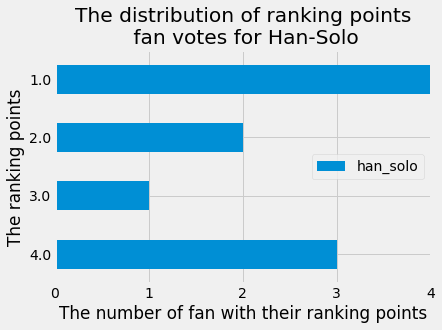

In [75]:
#Plot bar chart:
result = to_barchart_check.value_counts().sort_index(ascending=False)

result.plot.barh()
plt.xticks(ticks=np.arange(0,10,1),label=[0, 1, 2, 3, 4])
plt.xlim([0, 4])

plt.xlabel('The number of fan with their ranking points')
plt.ylabel('The ranking points')

plt.title('The distribution of ranking points\n fan votes for Han-Solo')
plt.legend()
plt.show()

From the statistic distribution for ranking point of `Han-Solo` result, we got __50% votes less than 2 points__, and __the remain is greater than 2 points__. This is match for overall data with 67,5% like `Han-Solo` and `Yoda` among 100% survey data.


__CONCLUSION__: 
1. __The character with most loving from everyone is `Han-Solo`, especially from Ms./Mrs. and people whose age above 45 years old__
2. In the fan group, 50% loving `Han-Solo` but there are 50% is normal => __A half of Episode's fan like `Han-Solo`__
3. Overall, __almost no character being hate by everyone__, the worst result we get is `Unfamiliar`, and it is normal.

# How about the seen votes for each episode?

Firstly, let's draw a simple Piechart to see the overview distribution of seen votes for each episode:

In [76]:
#Get data:
seen_result = starwar[starwar.columns[3:9]]
sum_seen = seen_result.sum()

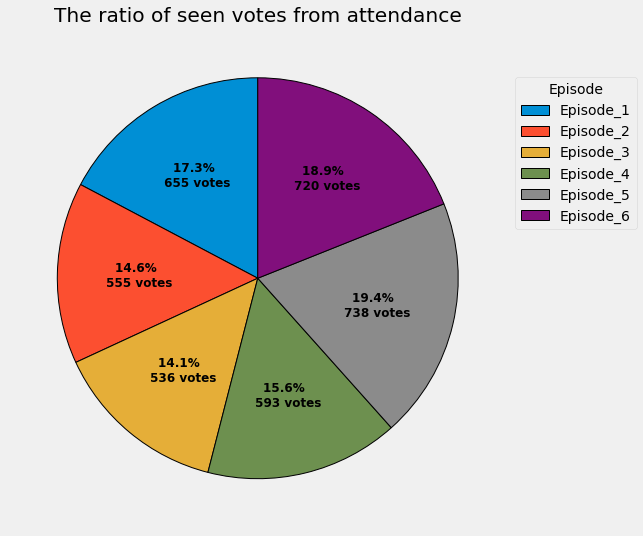

In [77]:
#Plot the pie:

#Define data:
to_piechart = list(sum_seen)
#Define autopct:
def get_pct(pct, data):
    result = int(pct/100*np.sum(data))
    return ('{:.1f}% \n {} votes'.format(pct, result))
#Define key:
key = ['Episode_{}'.format(i) for i in range(1,7)]
#Define the wedges:
wd = {'linewidth' : 1, 'edgecolor':'black'}

#Plot:
fig, ax = plt.subplots(figsize=(8,9))
wedges, texts, autotexts = ax.pie(x = to_piechart,
                                 autopct = lambda pct:get_pct(pct, to_piechart),
                                 wedgeprops = wd,
                                 startangle=90)
ax.legend(wedges, key, title='Episode', loc=6, bbox_to_anchor=[1.0, 0.75])
plt.setp(autotexts, size=12, weight='bold')
ax.set_title('The ratio of seen votes from attendance')

plt.show()

Not far as expect, __Episode V: The Empire Strikes Back is the expisode get the most votes as have seen by attendance__. Now we have some question to digger in:
- __Is the region with mostly votes for have seen will be the region with the worst ranking points?__
- In the fan group: _All of them have seen the episode_, __OR__, _they heard from anyone_ that this Episode so good, _and ranking it with good points??_
- __What age is the mostly seen this episode?__
- Among `Male` and `Female`, __what gender is mostly seen this episode?__

For the task above, we will:
- Aggregate data by `Age` and filter by `Gender`, take the sum votes of two group and make a Pie chart to see the overview.
- Call back the result data of average ranking points for each location, combine with the sum votes for have seen episode, make the graph of Pie chart and Bar chart to compare.
- For the fan group: Create a simple Bar chart to show how many people have seen this episode.

First, we will answer the first question: __Is the region with mostly votes for have seen will be the region with the worst ranking points?__

In [78]:
## Prepare data for pie chart:
votes_piechart = sum_by_location['seen_5']

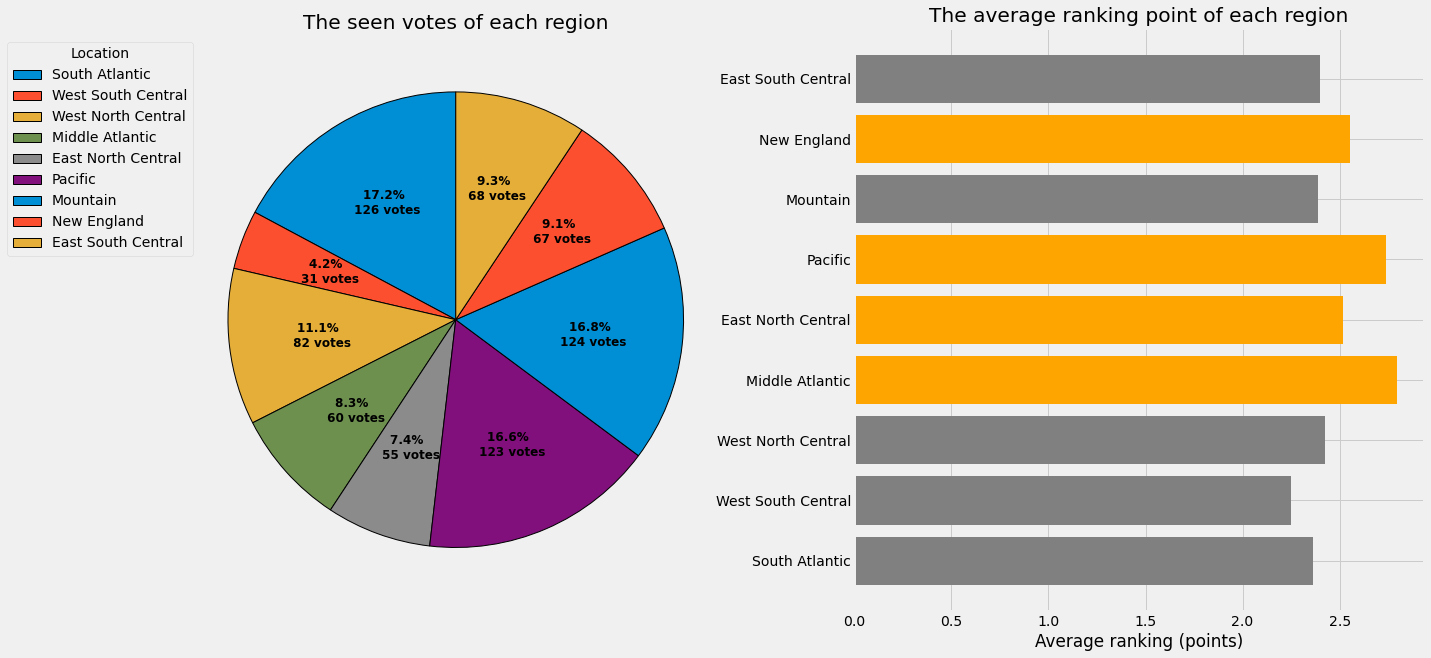

In [79]:
#To plot:
plot_the_pie_and_bar(votes_piechart, to_barchart,-1, 2.5, starwar,
                     'Location', 'The seen votes of each region', 'Average ranking (points)',
                     'The average ranking point of each region', 'greater')

The result is fairly to know:
- __The 1st votes from `South Atlantic`__, and luckily, though __the average ranking points__ isn't perfect but __not over than 2.5 points => this region still have some favourable for this Episode__
- __The second one, `Mountain`__, and they also have average ranking points less than 2.5 points like `South Atlantic`.

Now, move to the next question: __What's `Age` range, or what's `Gender` mostly seen this episode, and what's the ranking they gave for this episode?__

In [80]:
#Prepare data for graph
#1. For Male:
seen_by_male = age_male[age_male.columns[3:9]]
# Input sum seen of each age group:
sum_seen_by_male = seen_by_male.reset_index().groupby('Age').agg(np.sum)
seen_votes_pie = sum_seen_by_male['seen_5']

#2. For Female:
seen_by_female = age_female[age_female.columns[3:9]]
# Input sum seen of each age group:
sum_seen_by_female = seen_by_female.reset_index().groupby('Age').agg(np.sum)
seen_votes_pie_female = sum_seen_by_female['seen_5']

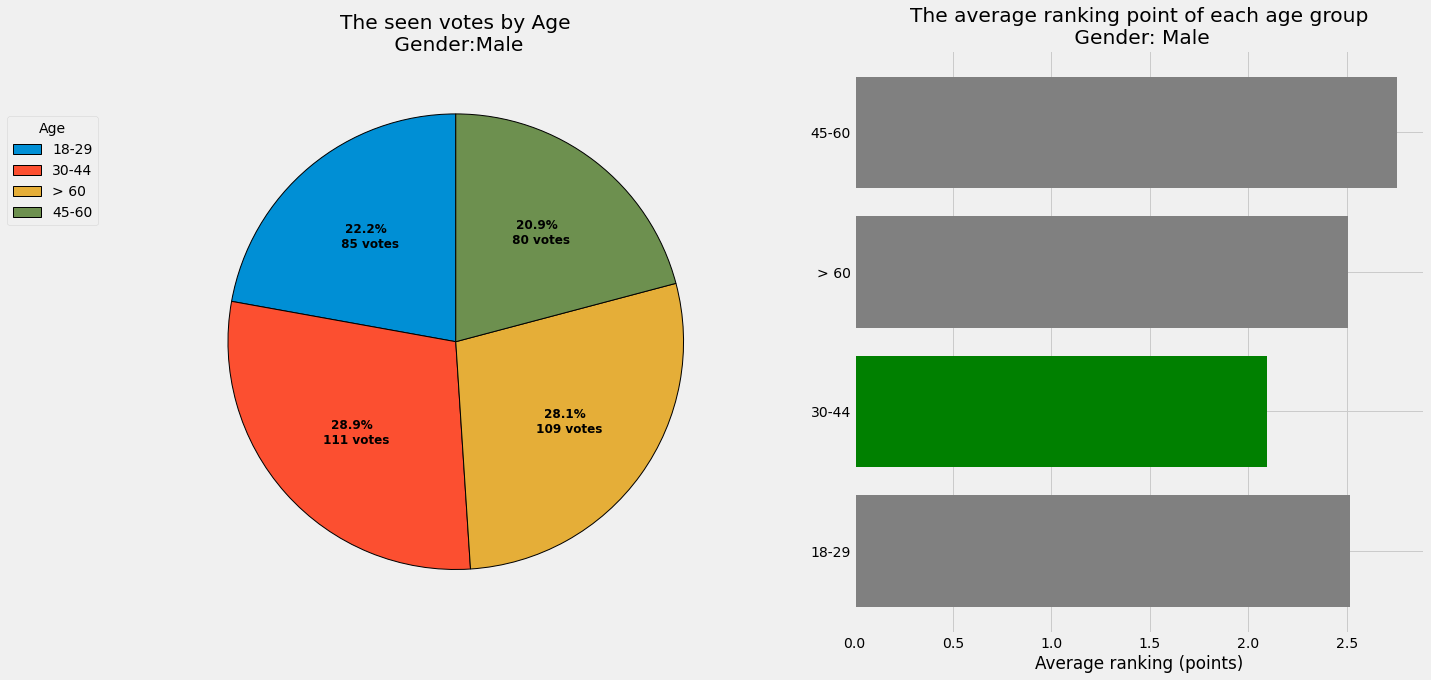

In [81]:
##Plot the data for Male:
plot_the_pie_and_bar(seen_votes_pie, mean_1,-4, 2.5, starwar,
                     'Age', 'The seen votes by Age\n Gender:Male', 'Average ranking (points)',
                     'The average ranking point of each age group\n Gender: Male', 'less')

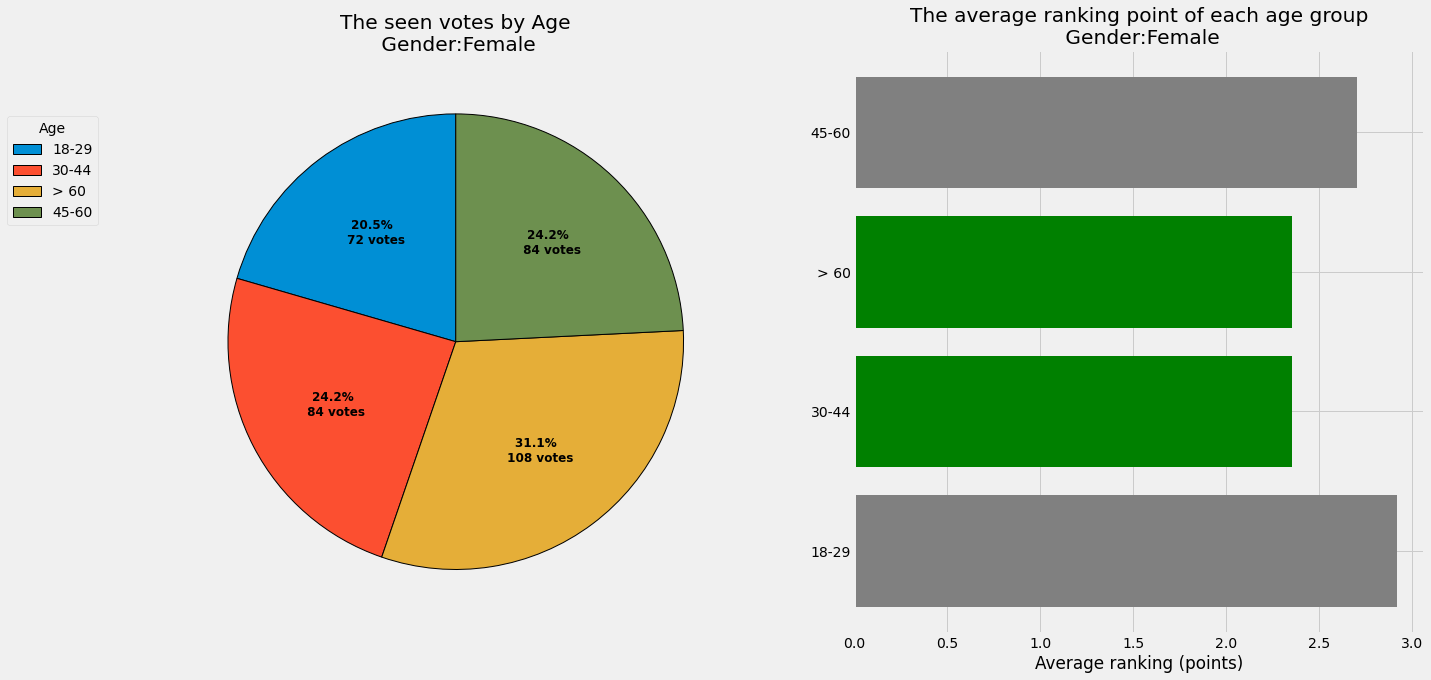

In [82]:
##Plot the data for Female:
plot_the_pie_and_bar(seen_votes_pie_female, mean_2,-4, 2.5, starwar,
                     'Age', 'The seen votes by Age\n Gender:Female', 'Average ranking (points)',
                     'The average ranking point of each age group\n Gender:Female', 'less')

Combine with the result depend on each age group, divide by `Gender` (named: `Ranking point by each gender in each age group\n for StarWar Episode V`), we get these observe:
- `Male` group: We can confirm again __our Mr. in age of `30-44` with good ranking points is the mostly group who have seen the Episode V__. In addition, our Senior People is the second one, but the ranking points isn't good as expect.
- `Female` group: __The mostly votes from our Mrs above 60 years old, with the good ranking points__, the second position have two range: `30-44` and `45-60`, but, the answer for question: Who's ranking good points for Episode V? => It's group age of `30-44`.
- We can get a funny conclusion: __The Women seem like Episode V than Men__, and we can confirm it right now:

In [83]:
## Prepare data for Overall Gender:
gender_check = starwar.copy().groupby('Gender')
sum_seen = gender_check.agg(np.sum)
mean_seen = gender_check.agg(np.mean)

## To plot:
sum_seen_pie = sum_seen['seen_5']
mean_seen_bar = mean_seen['ranking_5']

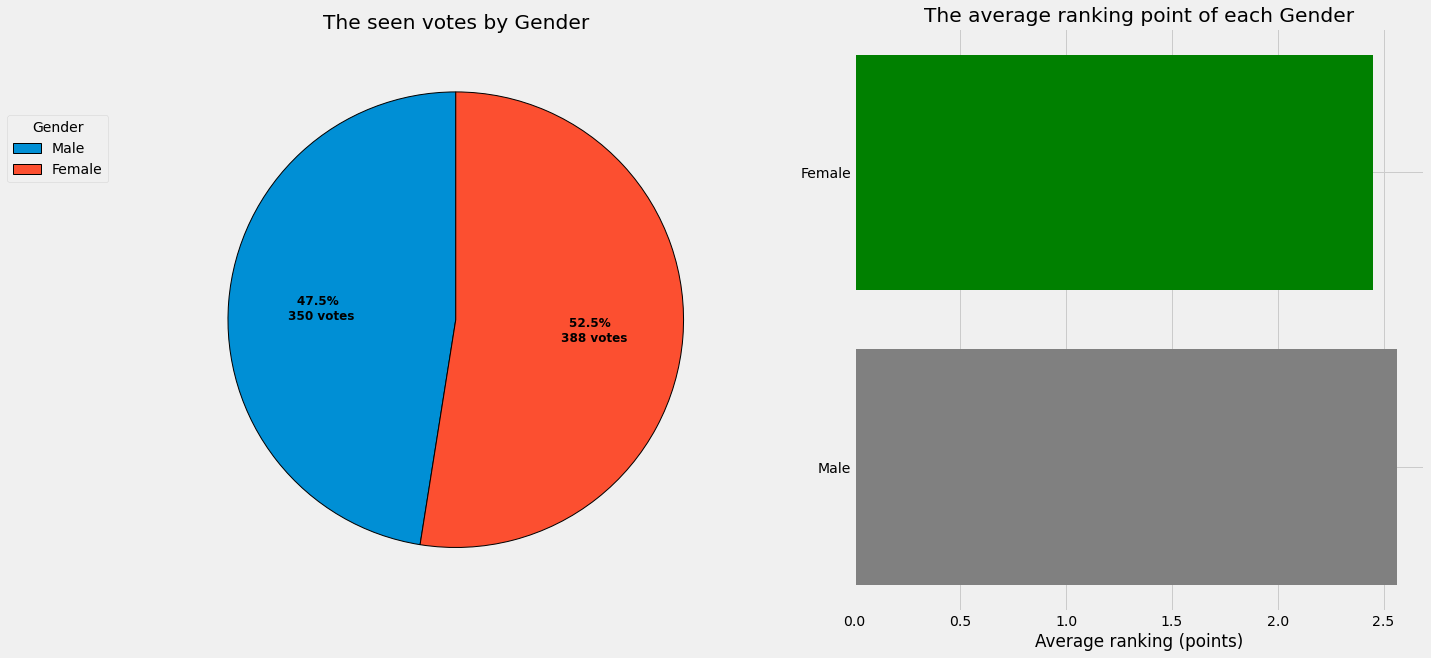

In [84]:
#Plot:
plot_the_pie_and_bar(sum_seen_pie, mean_seen_bar,-5, 2.5, starwar,
                    'Gender', 'The seen votes by Gender',
                    'Average ranking (points)',
                     'The average ranking point of each Gender', 'less')

Now, it's time to go back to the fan of Episode V: __All of them have seen the episode__, OR, they __heard from anyone__ that this Episode so good, __and ranking it with good points??__

But invidually, I think that the answer is right here: __The group of Mr. whose age in `30-44` is the mostly group votes that have seen the Episode__ _(Chart called: `The seen votes by Age\n Gender:Male`)_, and what's the fan of Episode V? It's them

For the detail, read the conclusion of `About the ranking of each episode`

__CONCLUSION__:
1. __The Women seem like Episode V: The Empire Strikes Back than Men__
2. __The mostly age group__ have seen this episode is: __`30-44` and for Men, and `above 60` for Women__
3.  __`South Atlantic`__ is the region that got mostly number of people have seen this episode, in other words, __Episode V is popular at `South Atlantic`__

## Outro: Fansite, fanchart...

We've went through all the main part of survey, now we're going to dive the funny part of survey: Member of fansite, fanchart... First of all, let's check the missing value at these field: `Do you consider yourself to be a fan of the Star Wars film franchise?`, `Do you consider yourself to be a fan of the Expanded Universe?Œæ`, `Do you consider yourself to be a fan of the Star Trek franchise?`

In [85]:
#Summary the missing value of these field:
num_co = [2, -6, -7]
col = starwar.columns[num_co]

statsic_missing = {}
for item in col:
    statsic_missing[item] = starwar[item].isnull().sum()
    
statsic_missing

{'Do you consider yourself to be a fan of the Star Wars film franchise?': 220,
 'Do you consider yourself to be a fan of the Star Trek franchise?': 0,
 'Do you consider yourself to be a fan of the Expanded Universe?Œæ': 824}

We'll checking carefully at 2 fields have missing value:

In [86]:
# Store the unique value:
for_df = {}
num_col_2 = [2, -7, 30]
col_2 = starwar.columns[num_col_2]

for name in col_2:
    for_df[name] = starwar[name].value_counts(dropna=False).sort_index(ascending=True)
    
df = pd.DataFrame(data = for_df)
df

,Do you consider yourself to be a fan of the Star Wars film franchise?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Are you familiar with the Expanded Universe?
False,275.0,NaN,NaN
True,539.0,NaN,NaN
NaN,220.0,824.0,220.0
No,NaN,112.0,604.0
Yes,NaN,98.0,210.0


Now we know what's the value inside each field, we do:
- Convert NaN as False, convert `Yes` as True and `No` as False
- Rename the columns, like:
1. `Do you consider.. Star Wars film franchise?` to be `star_wars_member`, `Do you consider... Star Trek franchise?` to be `star_trek_member`
2. `Are you familiar...` to be `know_expanded_ver`, the remain is `expanded_universe_mem`.

In [87]:
#Convert value:
convert_col_num = [30, -7]
convert_cols = starwar.columns[convert_col_num]

for cols in convert_cols:
    starwar[cols] = starwar[cols].map(yes_no, na_action='ignore')

In [88]:
starwar[starwar.columns[-7]].value_counts(dropna=False)

NaN      824
False    112
True      98
Name: Do you consider yourself to be a fan of the Expanded Universe?Œæ, dtype: int64

In [89]:
##Fill missing value:
#1. For field have less 220 value:
col_mis_num = [2, 30]
col_mis = starwar.columns[col_mis_num]

modify = starwar[col_mis].fillna(False, axis=1)
starwar.loc[:,col_mis] = modify
#Check:
starwar[col_mis].notnull().sum()

Do you consider yourself to be a fan of the Star Wars film franchise?    1034
Are you familiar with the Expanded Universe?                             1034
dtype: int64

In [90]:
#2.  For field greater than 220:
col_mis_2 = starwar.columns[-7]

starwar[col_mis_2].fillna(False, inplace=True)
starwar[col_mis_2].notnull().sum()

1034

In [91]:
## Check the final:
for_df_new = {}
for name in col_2:
    for_df_new[name] = starwar[name].value_counts(dropna=False).sort_index(ascending=True)
    
df2 = pd.DataFrame(data = for_df_new)
df2

,Do you consider yourself to be a fan of the Star Wars film franchise?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Are you familiar with the Expanded Universe?
False,495,936,824
True,539,98,210


In [92]:
#Check the last columns:
starwar[starwar.columns[-6]].value_counts(dropna=False)

No     611
Yes    423
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [93]:
#Convert:
col_fi = starwar.columns[-6]
starwar.loc[:,col_fi] = starwar[col_fi].map(yes_no)

#Check:
starwar[starwar.columns[-6]].value_counts(dropna=False)

False    611
True     423
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [94]:
#Rename the columns:
col_na_num = [2, -7, -6, 30]
col_na = starwar.columns[col_na_num]
name_rep = ['star_wars_member','expanded_universe_mem','star_trek_member','know_expanded_ver']

map_rep = {}
for nw, od in zip(name_rep, col_na):
    map_rep[od] = nw

starwar.rename(map_rep, axis=1, inplace=True)
starwar.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'star_wars_member', 'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5',
       'seen_6', 'ranking_1', 'ranking_2', 'ranking_3', 'ranking_4',
       'ranking_5', 'ranking_6', 'han_solo', 'luke_skywalker',
       'princess_leia_organa', 'anakin_skywalker', 'obi_wan_kenobi',
       'emperor_palpatine', 'darth_vader', 'lando_calrissian', 'boba_fett',
       'c-3p0', 'r2_d2', 'jar_jar_binks', 'padme_amidala', 'yoda',
       'Which character shot first?', 'know_expanded_ver',
       'expanded_universe_mem', 'star_trek_member', 'Gender', 'Age',
       'Household Income', 'Education', 'Location (Census Region)'],
      dtype='object')

In [95]:
#Check the final result value
for_df_final = {}
for name in name_rep:
    for_df_final[name] = starwar[name].value_counts(dropna=False).sort_index(ascending=True)
    
df3 = pd.DataFrame(data = for_df_final)
df3

,star_wars_member,expanded_universe_mem,star_trek_member,know_expanded_ver
False,495,936,611,824
True,539,98,423,210


The data was cleaned, now let's consider about the analytic. There are some way to analysis:
- The `expanded_universe_mem` seems to low, no one like it? Or it have not get a properly advertise way to everyone?
- Who will likely be the fan of StarWar? Who will be likely be the fan of StarTrek?
- Are the fan of Episode V be StarWar member?  

Let's move to question 1: __The `expanded_universe_mem` seems to low, no one like it? Or it have not get a properly advertise way to everyone?__

In [96]:
#Aggregate data :
fan_age = starwar.copy().groupby('Age').agg(np.sum)
gender_group = starwar.copy().groupby('Gender')
fan_gender = gender_group.agg(np.sum)

#To plot:
expand_age_1 = fan_age['expanded_universe_mem']
expand_age_2 = fan_age['know_expanded_ver']
expand_gender_1 = fan_gender['expanded_universe_mem']
expand_gender_2 = fan_gender['know_expanded_ver']

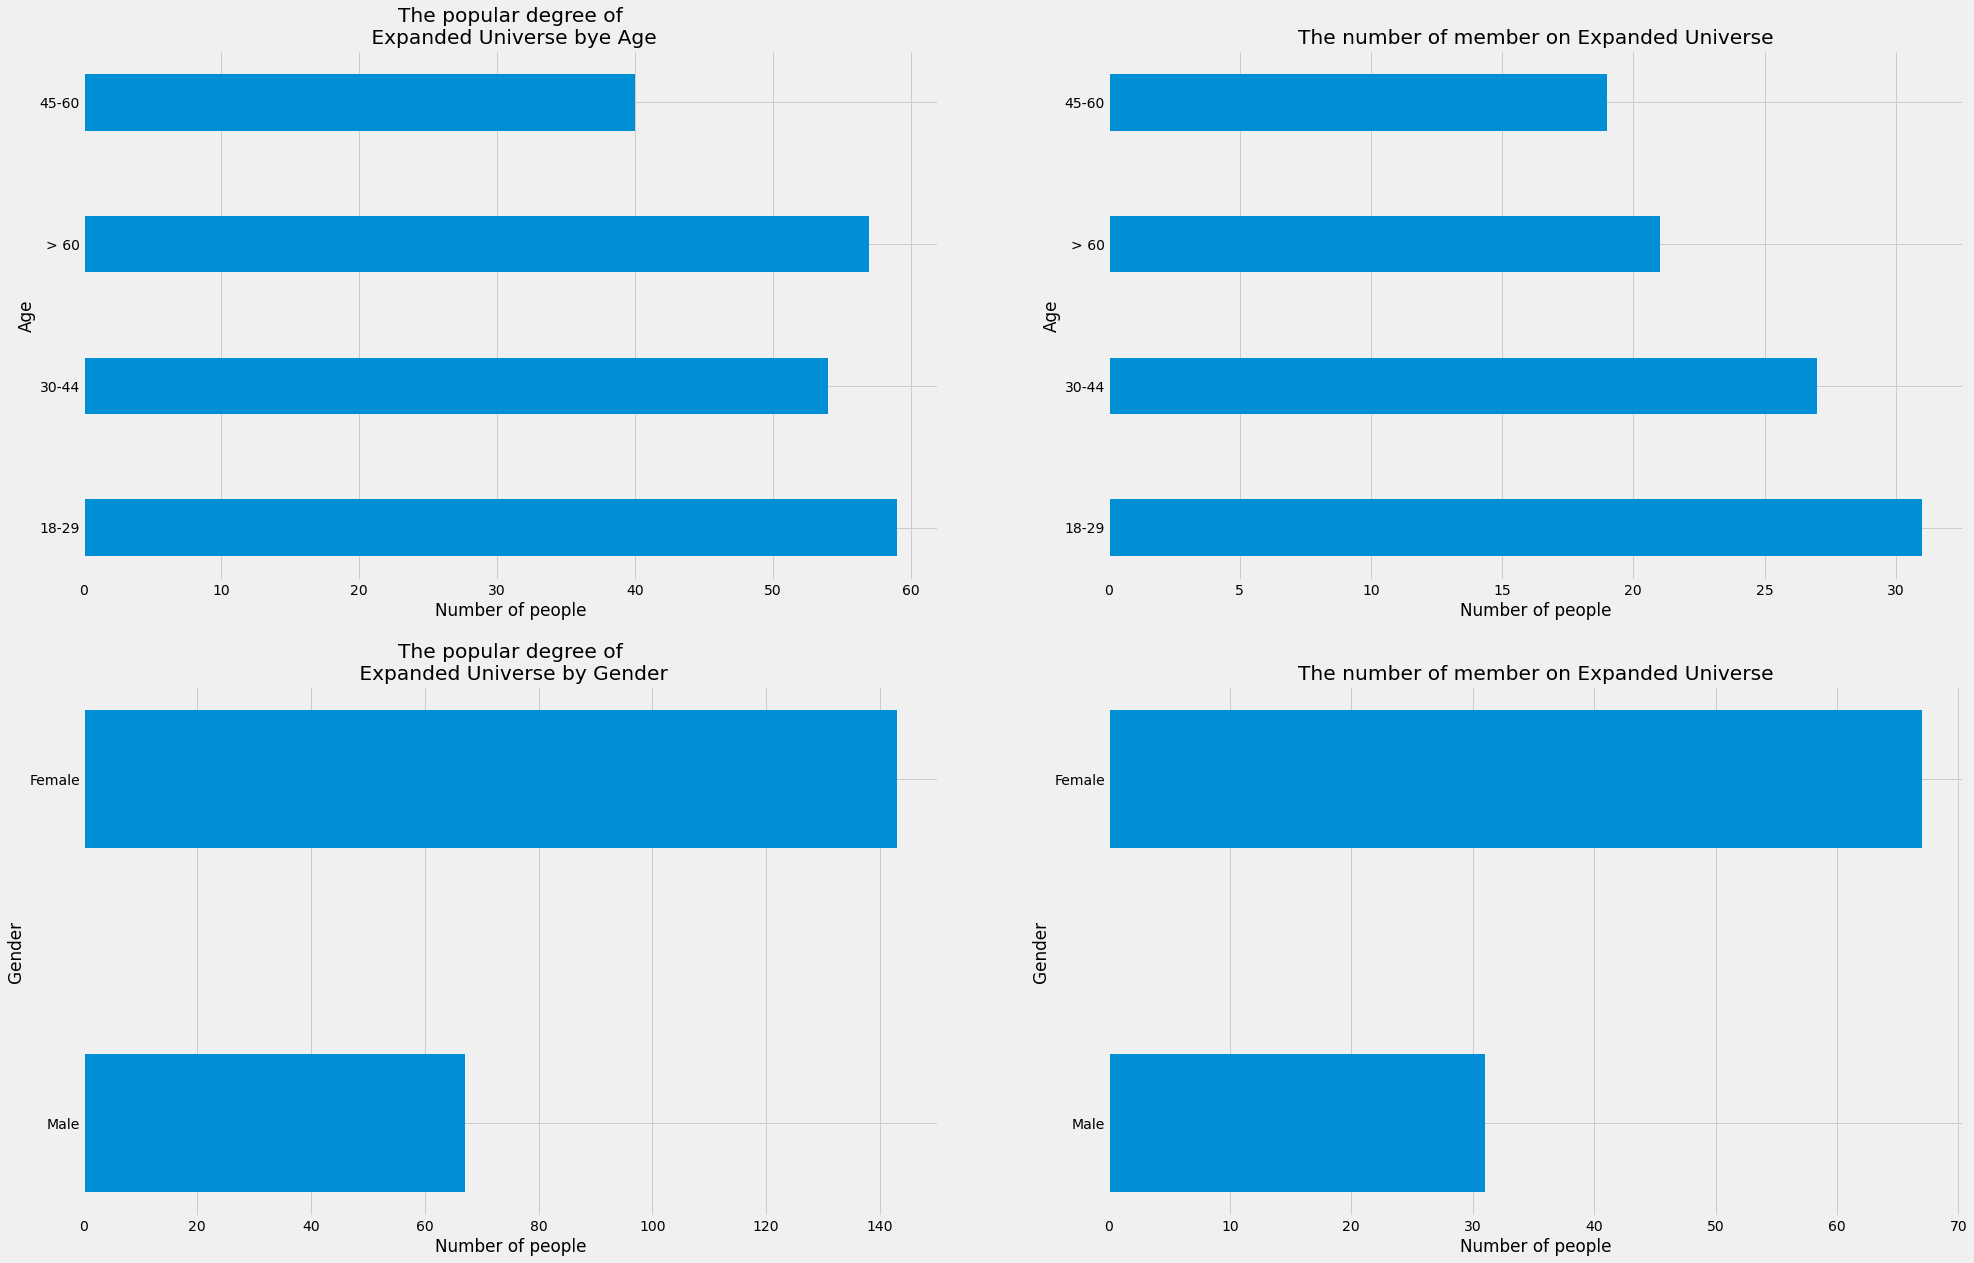

In [97]:
#To bar chart:

plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
plt.barh(y=list(starwar['Age'].unique()),width=expand_age_2, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Age')
plt.title('The popular degree of\n Expanded Universe bye Age')

plt.subplot(2,2,2)
plt.barh(y=list(starwar['Age'].unique()),width=expand_age_1, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Age')
plt.title('The number of member on Expanded Universe')

plt.subplot(2,2,3)
plt.barh(y=list(starwar['Gender'].unique()),width=expand_gender_2, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Gender')
plt.title('The popular degree of\n Expanded Universe by Gender')

plt.subplot(2,2,4)
plt.barh(y=list(starwar['Gender'].unique()),width=expand_gender_1, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Gender')
plt.title('The number of member on Expanded Universe')

plt.show()

In the graph we observe:
- The `Expanded Universe` is __popular with `Female` than `Male`__, and popular with __age by `above 60` + `18-29`__, but with the number is smaller than overall records (150 vs 1034 records)
- The number member of `Expanded Universe` __mostly `Female` and people with age below 30 years old__

The countracy thing is, all of people in age of `18-29` is voted for Episode V with not good points but __they're good about activity like Fansign, Fanchart__, and `Expanded Universe` is one of the example.

So, we know that __the scale (and the popular) of this fansign is small__ (for _the less number who know it_, and _the less member active in_). Let's see have they joined in other fansign or have another reason??

In [98]:
## Prepare data for 'StarWar' fansign:
stw_age_1 = fan_age['star_wars_member']
stw_age_2 = fan_age['star_trek_member']
stw_gender_1 = fan_gender['star_wars_member']
stw_gender_2 = fan_gender['star_trek_member']

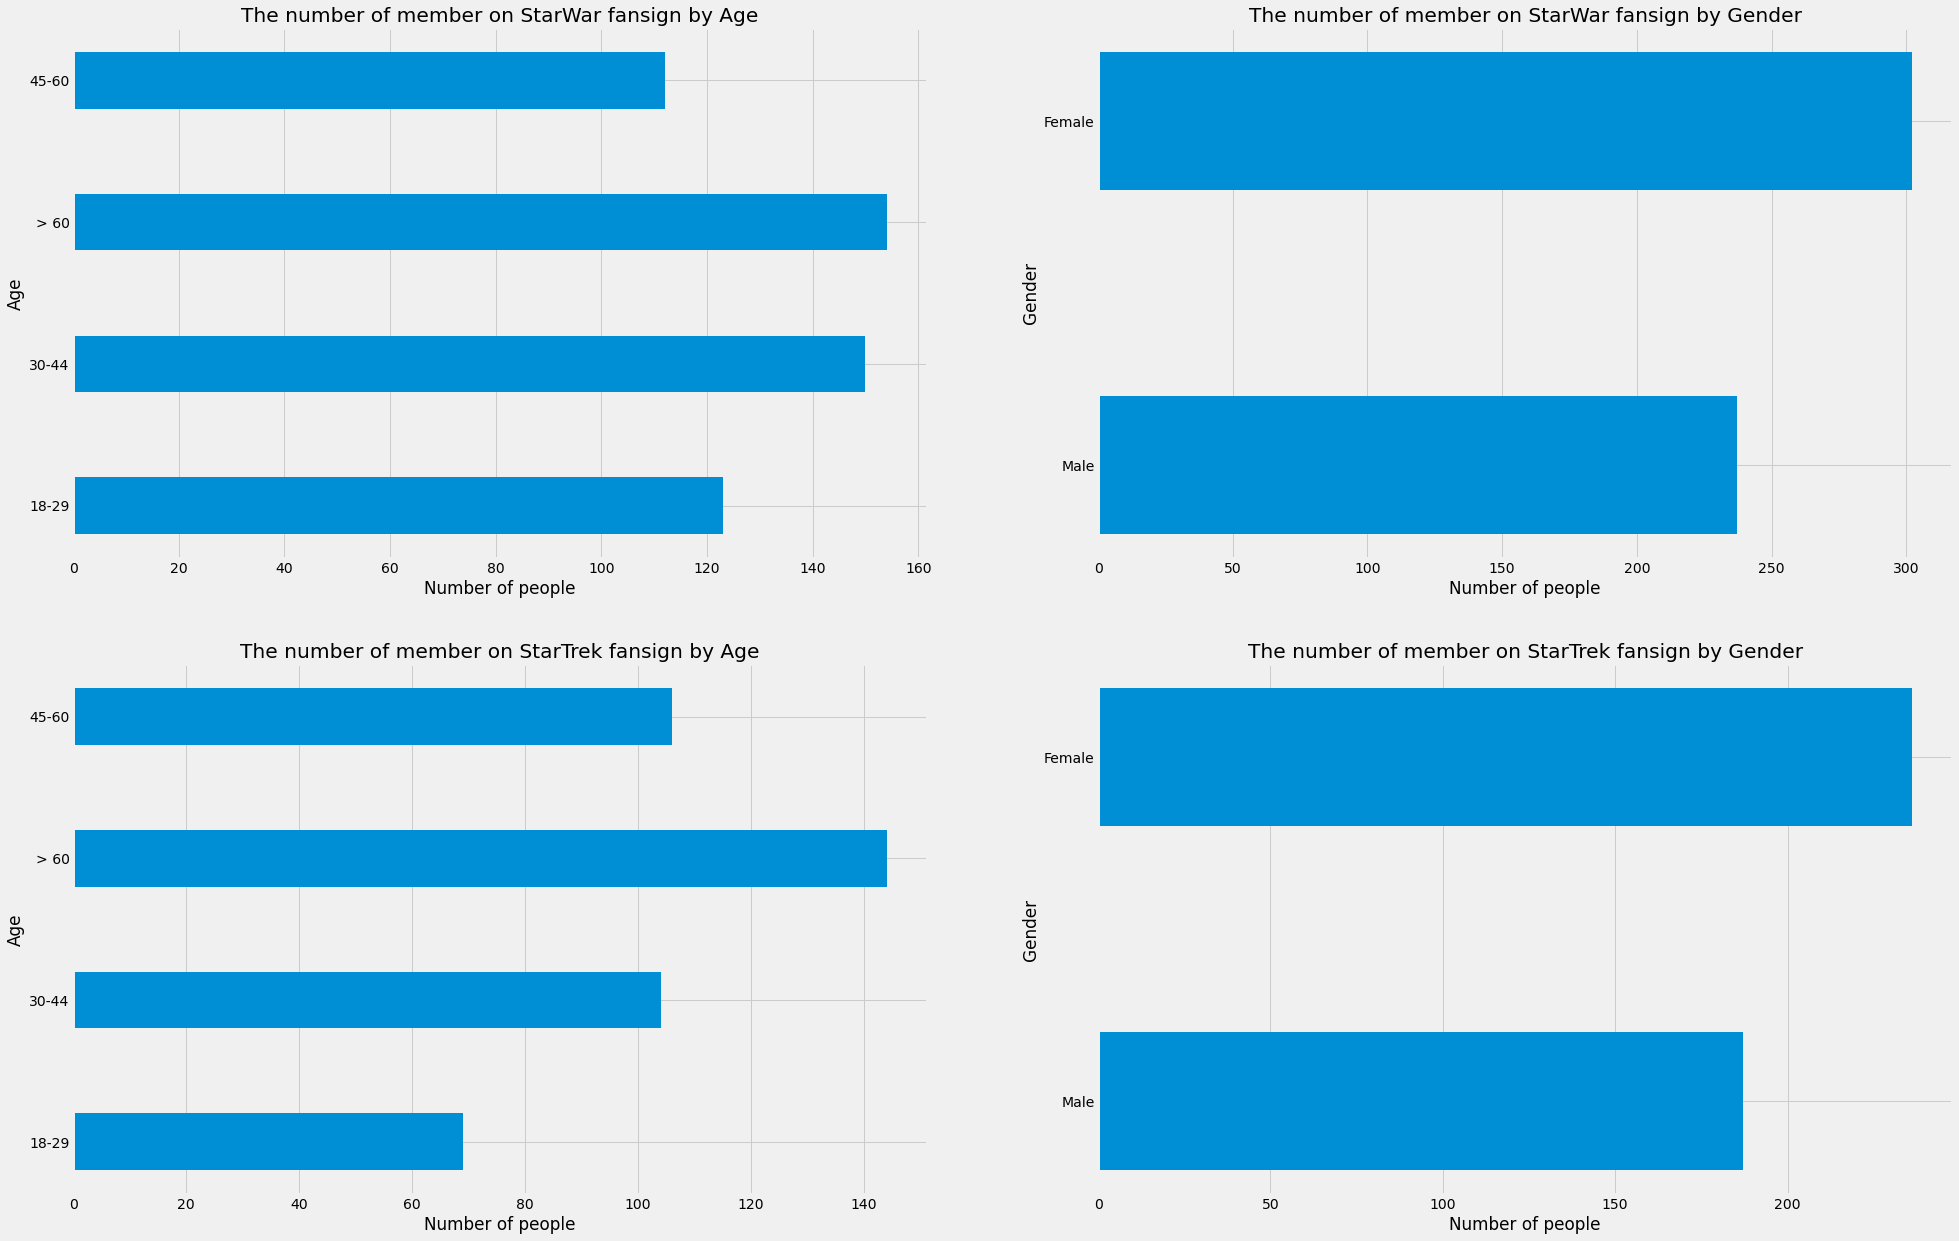

In [99]:
#Plot bar chart
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
plt.barh(y=list(starwar['Age'].unique()),width=stw_age_1, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Age')
plt.title('The number of member on StarWar fansign by Age')

plt.subplot(2,2,2)
plt.barh(y=list(starwar['Gender'].unique()),width=stw_gender_1, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Gender')
plt.title('The number of member on StarWar fansign by Gender')

plt.subplot(2,2,3)
plt.barh(y=list(starwar['Age'].unique()),width=stw_age_2, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Age')
plt.title('The number of member on StarTrek fansign by Age')

plt.subplot(2,2,4)
plt.barh(y=list(starwar['Gender'].unique()),width=stw_gender_2, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Gender')
plt.title('The number of member on StarTrek fansign by Gender')

plt.show()

We can see the larger scale of `StarWar` and `StarTrek` fan-sign than `Expanded Universe`, describe 1 pattern for the question: __The expanded_universe_mem seems to low, no one like it? Or it have not get a properly advertise way to everyone?__ => It's because almost people have join in `StarWar` and `StarTrek` franchise's fansign, so they have no tend to join on other team:
- __Almost member is `Female`__, for the both of franchise's fansign.
- __The most actively member is people in age `above 60`__

__CONCLUSION__: 
- __`Female` is the mostly member in every franchise's fansign__, and depend on which franchise, have mostly people with certain age range: __`Expanded Universe` is people in age range `18-29`__, both __remain is `above 60`__
- The reason of `Expand Universe` have small scale is __almost people have joined in `StarWar` and `StarTrek` franchise fansign, especially the strongest fansign is `StarWar` fansign__ => they have no interest to join on other team (__except people in `18-29` age range, they want to find the new thing__)

## Conclusion:
1. __The Eposide V: The Empire Strikes Back__ is the episode with __highest ranking points among the rest episode of StarWar__ (caculate to the period for data is crawl and created, not in 2022)
2. Though Episode V is highest ranking episode, __but this episode can't be called the best__, because:
- __The mostly ranking__ for Episode V is __`Pacific`__, and __they don't taste it very well__ (average ranking points over 2.5 points => _so many people ranking it 3 and 4 points, even 5 points_)
- __The mostly seen this Episode is `South Atlantic` and `Mountain`__, they're ranking in __fairly good points__
- Only __`Male`__ group with __age range of `30-44` in `West South Central`__ ranking it with actually good points => __They can be considered to be the fan of StarWar Episode V__
- Other people except the fan of Episode V have feeling from __fairly OK to be normal__, __higher than other episode we survey, but not the best__ (_to be marked as the best, __that episode should get ranking points less than 2, as closer to 1 as better__)_
- People in age range `18-29` though not ranking with good points for this Episode, but __they're so actively in activity like Fansign, fanchart__ with the `Expanded Universe` franchise's fansign.
3. About the taste of character in Episode V:
- __The mostly character with the loving by everyone is `Han-Solo`__, but __`Female` attendance__ seem to __love this character than `Male`__
- __`Yoda`__ is ranked as the second one, but in actually result, __this character is `Somewhat Favourable` with everyone__
- __Other character__ is not worse as get points of 5, 6, __they're `Normal` or `Unfamiliar` with the attendance__
4. The Franchise fansign:
- No doubt, __the `StarWar` is the largest franchise fansign__, the smallest is `Expanded Universe` franchise fansign
- Because the `StarWar` fansign is largest, the `Expanded Universe` franchise fansign have not received notice much more as `StarWar`.
- __Almost `Female` is the member of these franchise fansign__
- __People with age above 60 years old__ is likely to be the __fan of both `StarWar` and `StarTrek`__, __people with age range in `30-44`__ is the second one after Senior attendance __likely be the fan of `StarWar`__ _(contains the fan of Episode V that mentioned above)_.